<a href="https://colab.research.google.com/github/ruzbro/data-analysis/blob/master/Hub_TaT_and_OTD_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize

In [75]:
# Standard Imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
print('Pandas', pd.__version__)


# For plotting and charts
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


import seaborn as sns
import os
print('MatPlotlib', mpl.__version__)
print('Seaborn', sns.__version__)

# BQ Imports and settings
project_id = 'data-insights-176500'

# To handle month conversions
import calendar

Pandas 0.24.2
MatPlotlib 3.0.3
Seaborn 0.9.0


In [76]:
# Authenticate with BQ SQL
# https://cloud.google.com/bigquery/docs/visualize-jupyter

from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project=project_id)

W0818 04:15:10.299200 140142097840000 _default.py:280] No project ID could be determined. Consider running `gcloud config set project` or setting the GOOGLE_CLOUD_PROJECT environment variable


### Initializing Functions for Big Query and Charts

In [0]:
#Query BQ
def query_to_bq1(query):
    if month_input is not None:
       query_params = [bigquery.ScalarQueryParameter('month', 'STRING', month_input)]
       job_config = bigquery.QueryJobConfig()
       job_config.query_parameters = query_params
       dataframe = client.query(query,job_config=job_config).to_dataframe()
    else: 
       dataframe = client.query(query).to_dataframe()
    return dataframe

#Query2
def query_to_bq2(query):
    if month_input is not None:
       query_params = [
           bigquery.ScalarQueryParameter('month', 'STRING', month_input),
           bigquery.ScalarQueryParameter('hub_code', 'STRING', hub_input)
       ]
       job_config = bigquery.QueryJobConfig()
       job_config.query_parameters = query_params
       dataframe = client.query(query,job_config=job_config).to_dataframe()
    else: 
       dataframe = client.query(query).to_dataframe()
    return dataframe
  
#Bar Chart
def visualize_bar_chart(x, x_label, y, y_label, title, style = "pastel"):
    sns.set_color_codes(style)
    plt.title(month_name + " " + title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    sns.barplot(x=x, y=y)
    return plt.show()
  
#Box Plot
# def visualize_box_plot(x, x_label, y, y_label, title):
#  sns.boxplot(x=x, y=y)
#  plt.title(title)
#  plt.xlabel(x_label)
#  plt.ylabel(y_label)
#  sns.plt.xlim(0.7, 1.0)
#  return plt.show()

def visualize_box_plot(x, x_label, y, y_label, title):
  sns.boxplot(x=x, y=y)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label, fontsize=14)
  # if x.name == 'object':
  #   sns.plt.ylim(y.quantile(0.01), y.max())
  # else:
  #  sns.plt.xlim(x.quantile(0.01), x.max())
  return plt.show()

def visualize_combo_chart(x, x_label, y, y_label, y2, y2_label, title, style = "pastel"):
  ax = sns.barplot(x=x, y=y)
  ax2 = ax.twinx()
  ax2.plot(ax.get_xticks(), y2, color="r")
  ax.set_title(title) #old:   ax.set_title(month_name + " " + title)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax2.set_ylabel(y2_label)
  ax2.figure.legend()
  sns.set_color_codes(style)
  plt.ylim((0, 0.4))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=85)
  return plt.show()

def visualize_combo_chart_dos(x, x_label, y, y_label, y2, x2, title):
  plt.bar(x, y, color='r', width = 0.50, align='center')
  plt.bar(x, x2, color='b', width = -0.50, align='edge')
#   plt.set_title(month_name + " " + title)
#   plt.set_xlabel(x_label)
#   plt.set_ylabel(y_label)
  return plt.show()

### Geovisualization using Folium

In [0]:
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [0]:
# Center map at starting LatLong coordinates
# m = folium.Map(location=[14.598614,120.978585])
m = folium.Map(location=[14.5615158,121.0346215]) # Bel-Air
folium.Marker([14.5615158,121.0346215], icon=folium.Icon(color='green', icon='info-sign'), popup='this is a test').add_to(m)

In [0]:
m

In [0]:
m.save('index.html')

In [0]:
!ls

adc.json  index.html  sample_data


In [0]:
# prev_day = 11
# prev_date_month = 5
# prev_date_year = 2015
# SF_COORDINATES = (37.76, -122.45)
# crimedata = pd.read_csv('./demo.csv')

state_geo = './SFPD.json'

In [0]:
# list_of_crimes = ["WARRANTS","OTHER OFFENSES","LARCENY/THEFT","VEHICLE THEFT","VANDALISM","NON-CRIMINAL","ROBBERY","ASSAULT","WEAPON LAWS","BURGLARY","SUSPICIOUS OCC","DRUNKENNESS","FORGERY/COUNTERFEITING","DRUG/NARCOTIC","STOLEN PROPERTY","SECONDARY CODES","TRESPASS","MISSING PERSON","FRAUD","KIDNAPPING","RUNAWAY","DRIVING UNDER THE INFLUENCE","SEX OFFENSES FORCIBLE","PROSTITUTION","DISORDERLY CONDUCT","ARSON","FAMILY OFFENSES","LIQUOR LAWS","BRIBERY","EMBEZZLEMENT","SUICIDE","LOITERING","SEX OFFENSES NON FORCIBLE","EXTORTION","GAMBLING","BAD CHECKS","TREA","RECOVERED VEHICLE","PORNOGRAPHY/OBSCENE MAT"]
# list_of_pdistrict = ["NORTHERN","PARK","INGLESIDE","BAYVIEW","RICHMOND","CENTRAL","TARAVAL","TENDERLOIN","MISSION","SOUTHERN"] 
count_of_pdistrict = {"NORTHERN":0,"PARK":0,"INGLESIDE":0,"BAYVIEW":0,"RICHMOND":0,"CENTRAL":0,"TARAVAL":0,"TENDERLOIN":0,"MISSION":0,"SOUTHERN":0}

In [0]:
# initialize empty map zoomed in on San Francisco
# m = folium.Map(location=SF_COORDINATES, zoom_start=13,tiles='CartoDBPositron')
# cluster = folium.plugins.MarkerCluster(name="Previous Crimes").add_to(m)

In [0]:
# add a marker for every record in the filtered data, use a clustered view
for each in crimedata[0:878050].iterrows():
    if ((int(each[1]['Day'])==prev_day) and (int(each[1]['Month'])==prev_date_month) and (int(each[1]['Year'])==prev_date_year)):
        crime_name = list_of_crimes[int(each[1]['Category'])-1]
        occ_date = "%s-%s-%s"%(str(prev_day),str(prev_date_month),str(prev_date_year))
        pdistrict = list_of_pdistrict[int(each[1]['PdDistrict'])-1]
        count_of_pdistrict[pdistrict]=(count_of_pdistrict[pdistrict])+1
        location = "%s,%s"%(each[1]['Y'],each[1]['X'])
        folium.Marker(location = [each[1]['Y'],each[1]['X']], popup='<b>Occured date: </b>%s<br></br><b>Crime Type: </b>%s<br></br><b>Police District: </b>%s<br></br><b>Location: </b>%s'%(occ_date,crime_name,pdistrict,location),).add_to(cluster)

In [0]:
crime_count = open('./crime_countdata.csv','w')
crime_count.write('PD,Crime_Count\n')
for key in count_of_pdistrict:
    crime_count.write("%s,%s\n"%(key,str(count_of_pdistrict[key])))
crime_count.close()

In [0]:
state_data = pd.read_csv('./crime_countdata.csv')
m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['PD', 'Crime_Count'],
    key_on='feature.id',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.9,
    legend_name='Crime Rate'
)

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [0]:
non_violent_loc =[[ 37.783003799999996,-122.4124143],[37.77436883,-122.5058834],[37.74491907,-122.47577350000002],[37.71083265,-122.43244650000001]]
violent_loc=[[37.72156474,-122.47318200000001],[37.73511269,-122.4845457],[ 37.73449811,-122.4448541],[37.76978409,-122.449123]]
for loc in non_violent_loc:
    folium.CircleMarker(location=loc, radius=30,
            popup='<b>Prediction Type: </b>Non-Violent Crime<br></br><b>Location: </b>%s'%(loc), line_color='#3186cc',
            fill_color='#FFFFFF',fill_opacity=0.7, fill=True).add_to(m)
for loc in violent_loc:
    folium.CircleMarker(location=loc, radius=30,
            popup='<b>Prediction Type: </b>Violent Crime<br></br><b>Location: </b>%s'%(loc), line_color='#3186cc',
            fill_color='#000000',fill_opacity=0.7, fill=True).add_to(m)

In [0]:
folium.TileLayer(tiles='Stamen Toner',name="Stamen Toner").add_to(m)
folium.TileLayer(tiles='Stamen Terrain',name="Stamen Terrain").add_to(m)
folium.LayerControl().add_to(m)
m.add_child(MeasureControl())
# this generates NameError: name 'url' is not defined
FloatImage(url, bottom=5, left=85).add_to(m)

### Examples of Google Spreadsheet API

In [0]:
# Import Google Spreadsheet library and authenticate with same Google Credentials
import gspread as gs
from oauth2client.client import GoogleCredentials

gc = gs.authorize(GoogleCredentials.get_application_default())
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [0]:
# Open Google worksheet and update cells using specified dataframe
sh = gc.open('TaT Analysis by Segment and Hub')   # use gc.create method to create new worksheet instead
worksheet = sh.add_worksheet(title="Sheet 9999", rows="48", cols="7") # Increment cols + 1 for dataframe index
set_with_dataframe(worksheet, df_sum,1,1, include_index=True)   # https://pythonhosted.org/gspread-dataframe/

# worksheet = gc.open('Provincial Weekly Volume by Hub').sheet1
# Need to ***RESEARCH*** this command further worksheet = sh.del_worksheet("Sheet 9999")

In [0]:
# create Pivot Table by Hub and specify aggregate value(s)
pt_hub_pct = pd.pivot_table(df_hub_wk, values = 'vol_contri_to_week', index=['hub'], columns=['week_mon'], aggfunc = np.average)

In [0]:
# reverse sorting of Hub names in preparation for GSheet chart
pt_hub_pct = pt_hub_pct.sort_values('hub', ascending=False)
pt_hub_pct.head(20)

In [0]:
# Open Google worksheet and update cells using specified dataframe
sh = gc.open('Provincial Weekly Volume by Hub') # use gc.create method to create new worksheet instead
# worksheet = gc.open('Provincial Weekly Volume by Hub').sheet1
worksheet = sh.add_worksheet(title="Sheet 9999")
set_with_dataframe(worksheet, pt_hub_pct,1,1, include_index=True)   # https://pythonhosted.org/gspread-dataframe/

### Mount Google Drive to Colab server using Drive FUSE

In [77]:
# Mount Google Drive and specify /tempData as current working directory
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/tempData/")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!python -m site --user.base

/usr/lib/python3.6/site.py [--user-base] [--user-site]

Without arguments print some useful information
With arguments print the value of USER_BASE and/or USER_SITE separated
by ':'.

Exit codes with --user-base or --user-site:
  0 - user site directory is enabled
  1 - user site directory is disabled by user
  2 - uses site directory is disabled by super user
      or for security reasons
 >2 - unknown error



In [159]:
!ls *.jpg

MM03HubCentralDayDelAugust18.jpg    MRHubCDO01DayDelAugust17.jpg
MM03HubCentralDelvsOTDAugust18.jpg  MRHubCDO01DelvsOTDAugust17.jpg
MM03HubCentralDelvsTaTAugust18.jpg  MRHubCDO01DelvsTaTAugust17.jpg
MM03HubCentralOTDVarAugust18.jpg    MRHubCDO01OTDVarAugust17.jpg
MM03HubCentralTaTHoursAugust18.jpg  MRHubCDO01TaTHoursAugust17.jpg


In [0]:
!mv *.jpg *.old.jpg

mv: target '*.old.jpg' is not a directory


In [0]:
!pwd
!ls "/content/gdrive/My Drive/tempData"

In [0]:
# move files to tempData
!mv *.jpg ./gdrive/"My Drive"/tempData

In [0]:
# list files in tempData
!ls ./gdrive/"My Drive"/tempData


# SQL queries and User-entered Parameters

In [0]:
sql_hub_sum = """
/* Generate OTD Summary Statistics for ALL Couriers given 2 parameters: Hub Service Zones (@hub_code) and date (@month)
*/
SELECT
       date_trunc(o.date_delivered, month) month,
   o.delivery_hub, o.delivery_courier,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
WHERE format_date('%Y%m', o.date_delivered) in (@month)                         # filter using Input Month
   and substr(o.delivery_city_xcode,1,4) in (
      SELECT distinct city_xcode
      FROM `data-insights-176500.dw_parameters.t_service_zones`
      where courier in ( 'Quad-X') -- exclude 'Delivery Partner'
         and hub in (@hub_code)                                                 # filter orders for specific Hub
         and acceptance_method = 'acceptance'
         and to_date > current_date()
      )
group by 1,2,3
"""

In [0]:
sql_hub_stats = """
/* Generate Statistics to analyze Daily Statistics by City for specific hub (@hub_code) and date (@month)
*/
SELECT o.date_delivered, 
   concat(o.delivery_city," ",substr(o.delivery_city_xcode,1,4)) delivery_city_xcode,
   substr(o.delivery_city_xcode,1,4) del_xcode,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
where delivery_courier in ('Quad-X')                                            # exclude 'Delivery Partner','LBC Express'
   and format_date('%Y%m', o.date_delivered) in (@month)                        # filter using Input Month
   and o.delivery_hub in (@hub_code)                                            # filter orders for specific Hub
   and delivery_hub not in ('LBC Express') 
GROUP BY 1,2,3
order by 1,4 desc
"""

In [0]:
sql_hub_orders = """
/* Generate Statistics to analyze Daily Statistics by City for specific hub (@hub_code) and date (@month)
*/
SELECT o.date_delivered, 
   concat(o.delivery_city," ",substr(o.delivery_city_xcode,1,4)) delivery_city_xcode,
   substr(o.delivery_city_xcode,1,4) del_xcode,
   o.order_id,o. delivered_within_sla, o.delivery_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
where delivery_courier in ('Quad-X')                                            # exclude 'Delivery Partner','LBC Express'
   and format_date('%Y%m', o.date_delivered) in (@month)                        # filter using Input Month
   and o.delivery_hub in (@hub_code)                                            # filter orders for specific Hub
order by 1,4 desc
"""

In [0]:
sql_hub_daily = """
/* Analyze Daily OTD Statistics given 2 parameters: specific hub (@hub_code) and date (@month)
*/
SELECT 
   extract(day from o.date_delivered) day_delv, 
   format_date('%u-%a', o.date_delivered) day_of_week,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
where delivery_courier in ('Quad-X')                                            # exclude 'Delivery Partner','LBC Express'
   and format_date('%Y%m', o.date_delivered) in (@month)                        # filter using Input Month
   and delivery_hub in (@hub_code)                                              # filter orders for specific Hub
group by 1,2
order by 1
"""

In [0]:
sql_hub_daily2 = """
/* Analyze Daily OTD Statistics with date_fill to add null dates
*/
with orders as (
SELECT
   o.date_delivered,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
from `data-insights-176500.xa_orders.t_main` as o 
where delivery_courier in ('Quad-X')                                            # exclude 'Delivery Partner'
   and format_date('%Y%m', o.date_delivered) in (@month)                        # filter using Input Month
   and delivery_hub in (@hub_code)                                              # filter orders for specific Hub
group by 1
),
max_date as (
select max(date_delivered) as max_date
from `data-insights-176500.xa_orders.t_main` as o 
where delivery_courier in ('Quad-X')                                            # exclude 'Delivery Partner'
   and format_date('%Y%m', o.date_delivered) in (@month)                        # filter using Input Month
   and delivery_hub in (@hub_code)                                              # filter orders for specific Hub
)

select d.date date,
   extract(day from d.date) day_delv, 
   format_date('%u-%a', d.date) day_of_week,
   order_count, otd_pct, avg_tat_hours
from `bigquery-public-data.utility_us.date_greg` d
left join orders as o on d.date = o.date_delivered
join max_date as max on d.date <= max.max_date
where 
   format_date('%Y%m', d.date) in (@month)
order by 1
"""

In [0]:
sql_qx_sum = """
/* Generate OTD Summary Statistics for QuadX given date (@month)
*/
SELECT
   max(o.date_delivered) month,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
WHERE format_date('%Y%m', o.date_delivered) in (@month)                         # filter using Input Month
   and substr(o.delivery_city_xcode,1,4) in (
      SELECT distinct city_xcode
      FROM `data-insights-176500.dw_parameters.t_service_zones`
      where courier in ('Quad-X')                                      # exclude 'Delivery Partner','LBC Express'
         and acceptance_method = 'acceptance'
         and to_date > current_date()
      )
#  and date_delivered < '2019-08-11'                                            # specify past date to compare against
"""

In [0]:
sql_qxhub_sum = """
/* Generate OTD Summary Statistics for QuadX summarized by Hub given date (@month)
*/
SELECT
   max(o.date_delivered) month,
   o.delivery_hub,
   count(o.order_id) order_count,
   sum(o.delivered_within_sla) / count(o.order_id) otd_pct, 
   avg(o.delivery_tat_hours) avg_tat_hours
FROM `data-insights-176500.xa_orders.t_main` as o
WHERE format_date('%Y%m', o.date_delivered) in (@month)                         # filter using Input Month
   and substr(o.delivery_city_xcode,1,4) in (
      SELECT distinct city_xcode
      FROM `data-insights-176500.dw_parameters.t_service_zones`
      where courier in ('Quad-X')                                       # exclude 'Delivery Partner','LBC Express'
         and acceptance_method = 'acceptance'
         and to_date > current_date()
      )
group by 2
order by 3 desc 
"""

In [96]:
#@title Date fields
# dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]
# text_and_dropdown = 'value' #@param ["1st option", "2nd option", "3rd option"] {allow-input: true}

date_input = '2019-08-01' #@param {type:"date"}
month_input = date_input[0:7].replace("-","")

if month_input[4:6] in ['01', '02', '03', '04', '05', '06', '07', '08', '09']:
  month_name = calendar.month_name[int(month_input[5:6])]
else:
  month_name = calendar.month_name[int(month_input[4:6])]
print(month_input)

201908


# Monthly Hub On-Time Delivery (OTD)

## Overview of Hub Coverage and Metro Manila Hubs

In [104]:
# Run SQL to generate summary of Performance Metrics for QuadX given date (@month)

sum_qx0 = query_to_bq1(sql_qx_sum)
sum_qx0.head()

,month,order_count,otd_pct,avg_tat_hours
0,2019-08-18,385052,0.985332,57.460501


In [105]:
# Run SQL to generate summary of Performance Metrics for QuadX Hubs given date (@month)

sum_qxhub = query_to_bq1(sql_qxhub_sum)
sum_qxhub.head(20)

,month,delivery_hub,order_count,otd_pct,avg_tat_hours
0,2019-08-18,Northeast Hub,57895,0.981829,45.855998
1,2019-08-18,East Hub,37850,0.964254,53.265073
2,2019-08-18,Northwest Hub,36134,0.989788,41.466347
3,2019-08-18,Central Hub,34627,0.984347,43.453086
4,2019-08-17,CebCentral Hub,32280,0.995787,77.547026
5,2019-08-18,South Hub,26003,0.987463,45.648310
6,2019-08-18,West Hub,25052,0.991817,38.750918
7,2019-08-18,SanPedro01 Hub,16828,0.995662,37.577906
8,2019-08-17,GenSan01 Hub,15700,0.998662,62.937962
9,2019-08-16,Davao01 Hub,14265,0.998177,74.713635


In [106]:
sum_qxhub.head(20)

,month,delivery_hub,order_count,otd_pct,avg_tat_hours
0,2019-08-18,Northeast Hub,57895,0.981829,45.855998
1,2019-08-18,East Hub,37850,0.964254,53.265073
2,2019-08-18,Northwest Hub,36134,0.989788,41.466347
3,2019-08-18,Central Hub,34627,0.984347,43.453086
4,2019-08-17,CebCentral Hub,32280,0.995787,77.547026
5,2019-08-18,South Hub,26003,0.987463,45.648310
6,2019-08-18,West Hub,25052,0.991817,38.750918
7,2019-08-18,SanPedro01 Hub,16828,0.995662,37.577906
8,2019-08-17,GenSan01 Hub,15700,0.998662,62.937962
9,2019-08-16,Davao01 Hub,14265,0.998177,74.713635


### Central Hub by Month 2019

In [107]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Central Hub" # Makati, Metro Manila

sum_MM03 = query_to_bq2(sql_hub_sum)
sum_MM03.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Central Hub,Quad-X,34627,0.984347,43.453086
1,2019-08-01,LBC Express,LBC Express,489,0.965235,50.139059


In [108]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Central Hub" # Makati, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Makati City MM03,MM03,967,0.997932,26.056877
1,2019-08-01,Mandaluyong City MM05,MM05,422,0.992891,27.992891
2,2019-08-01,Pasay City MM11,MM11,400,1.000000,28.610000
3,2019-08-02,Makati City MM03,MM03,364,1.000000,28.087912
4,2019-08-02,Mandaluyong City MM05,MM05,97,1.000000,28.000000


In [109]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
49,2019-08-17,Mandaluyong City MM05,MM05,324,0.981481,29.712963
50,2019-08-17,Pasay City MM11,MM11,287,1.000000,29.202091
51,2019-08-18,Makati City MM03,MM03,87,1.000000,24.126437
52,2019-08-18,Mandaluyong City MM05,MM05,61,1.000000,24.459016
53,2019-08-18,Pasay City MM11,MM11,6,1.000000,20.833333


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

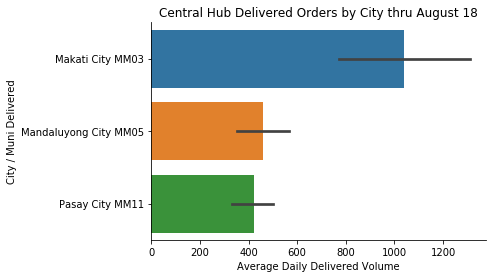

In [111]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Central Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # 'content/gdrive/"My Drive"/tempData/'
plotname = dirname + "MM03HubCentralDayDel" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

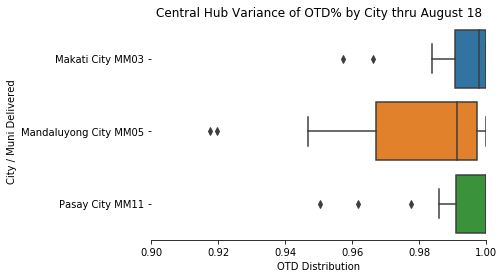

In [112]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Central Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM03HubCentralOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [113]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Central Hub" # Makati, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,1789,0.997205,27.084405
1,2,5-Fri,522,1.000000,27.923372
2,3,6-Sat,961,1.000000,36.089490
3,4,7-Sun,1285,0.994553,39.743191
4,5,1-Mon,3075,0.961626,56.631545


In [114]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,6,2-Tue,2807,0.944781,47.535447
4,5,1-Mon,3075,0.961626,56.631545
6,7,3-Wed,2695,0.966605,38.057885
7,8,4-Thu,1941,0.980422,32.732097
13,14,3-Wed,2978,0.985561,53.756212


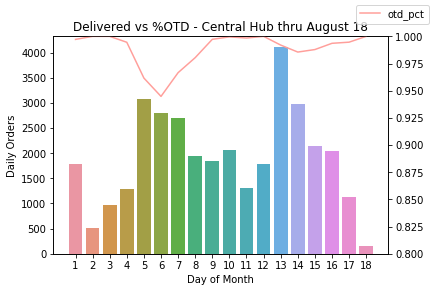

In [115]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Central Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM03HubCentralDelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

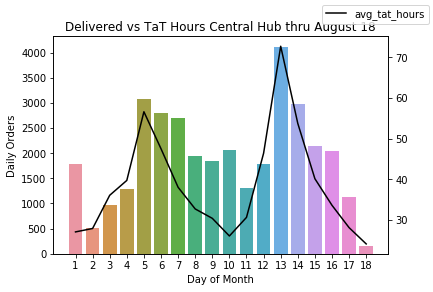

In [116]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black")
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Central Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM03HubCentralDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

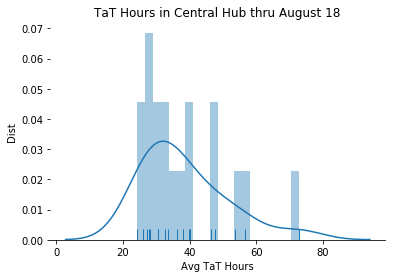

In [118]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Central Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM03HubCentralTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### East Hub by Month 2019

In [251]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "East Hub" # Taguig, Metro Manila

sum_MM16 = query_to_bq2(sql_hub_sum)
sum_MM16.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,753,0.985392,38.025232
1,2019-08-01,East Hub,Quad-X,37850,0.964254,53.265073


In [252]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "East Hub" # Taguig, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Pasig City MM12,MM12,806,0.996278,28.636476
1,2019-08-01,Taguig City MM16,MM16,758,0.968338,39.720317
2,2019-08-01,San Juan City MM15,MM15,271,0.944649,49.977860
3,2019-08-01,Cainta RZ05,RZ05,199,0.994975,47.783920
4,2019-08-01,Pateros MM13,MM13,44,1.000000,26.181818


In [253]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
91,2019-08-17,San Juan City MM15,MM15,103,0.951456,34.194175
92,2019-08-17,Cainta RZ05,RZ05,96,1.000000,31.989583
93,2019-08-17,Taytay RZ13,RZ13,65,1.000000,40.076923
94,2019-08-18,Pasig City MM12,MM12,71,1.000000,25.169014
95,2019-08-18,San Juan City MM15,MM15,4,1.000000,37.750000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

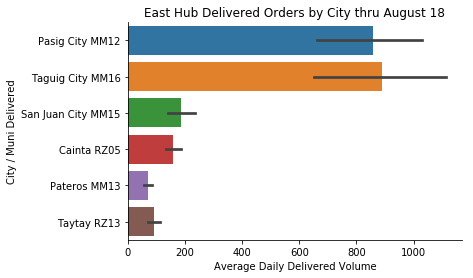

In [255]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("East Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM16HubEastDelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

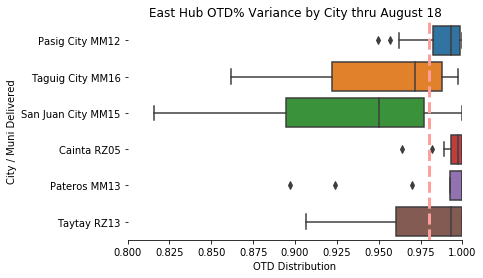

In [256]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("East Hub OTD% Variance by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM16HubEastOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [257]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "East Hub" # Makati, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,2121,0.979727,36.982555
1,2019-08-02,2,5-Fri,91,1.000000,28.406593
2,2019-08-03,3,6-Sat,918,0.986928,45.364924
3,2019-08-04,4,7-Sun,1265,0.988933,50.887747
4,2019-08-05,5,1-Mon,3191,0.904419,72.061109


In [258]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,2019-08-05,5,1-Mon,3191,0.904419,72.061109
5,2019-08-06,6,2-Tue,2969,0.917144,59.858201
6,2019-08-07,7,3-Wed,2752,0.945131,51.823038
7,2019-08-08,8,4-Thu,2930,0.948123,51.652901
14,2019-08-15,15,4-Thu,2601,0.956940,50.356017


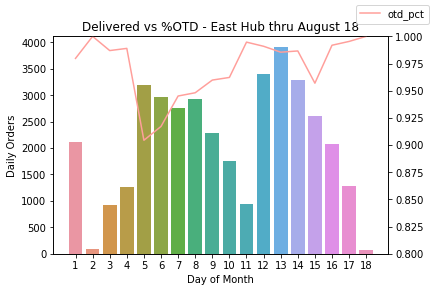

In [259]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - East Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM16HubEastDelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

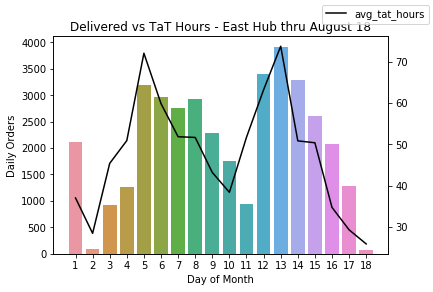

In [260]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - East Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM16HubEastDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

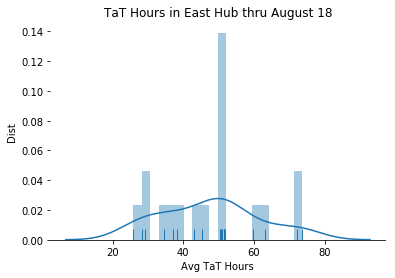

In [262]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in East Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM16HubEastTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
plt.show()

### 	Northeast Hub by Month 2019

In [263]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Northeast Hub" # Quezon City, Metro Manila

sum_MM14e = query_to_bq2(sql_hub_sum)
sum_MM14e.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Northwest Hub,Quad-X,20060,0.984796,42.633250
1,2019-08-01,Northeast Hub,Quad-X,57895,0.981829,45.855998
2,2019-08-01,LBC Express,LBC Express,1310,0.989313,38.739695


In [264]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Northeast Hub" # Quezon City, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Quezon City MM14,MM14,2052,0.995127,30.123782
1,2019-08-01,Caloocan City MM01,MM01,472,1.000000,25.531780
2,2019-08-01,Marikina City MM07,MM07,354,1.000000,24.663842
3,2019-08-01,San Jose Del Monte City BC21,BC21,195,1.000000,29.733333
4,2019-08-02,Quezon City MM14,MM14,702,0.997151,29.397436


In [265]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
67,2019-08-17,San Jose Del Monte City BC21,BC21,158,1.0,29.620253
68,2019-08-18,Quezon City MM14,MM14,233,1.0,26.369099
69,2019-08-18,Caloocan City MM01,MM01,71,1.0,24.183099
70,2019-08-18,Marikina City MM07,MM07,41,1.0,25.073171
71,2019-08-18,San Jose Del Monte City BC21,BC21,3,1.0,20.333333


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

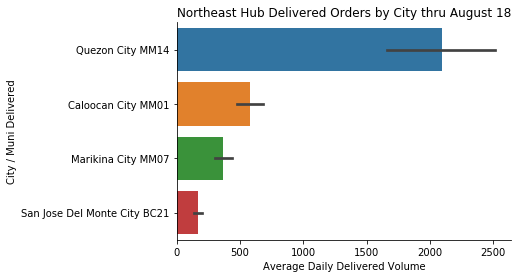

In [267]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Northeast Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname + "MM14eHubNortheastDelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

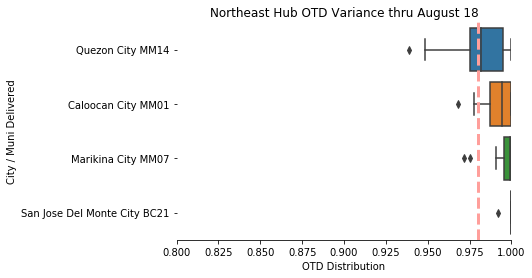

In [268]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Northeast Hub OTD Variance thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14eHubNortheastOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [269]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Northeast Hub" # Quezon City, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,3073,0.996746,28.764725
1,2019-08-02,2,5-Fri,1077,0.998143,29.322191
2,2019-08-03,3,6-Sat,2095,0.996659,37.348926
3,2019-08-04,4,7-Sun,1370,0.999270,38.194891
4,2019-08-05,5,1-Mon,4413,0.966236,59.711761


In [270]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
8,2019-08-09,9,5-Fri,2960,0.955068,36.144595
5,2019-08-06,6,2-Tue,4371,0.959963,52.501258
4,2019-08-05,5,1-Mon,4413,0.966236,59.711761
14,2019-08-15,15,4-Thu,3999,0.967992,48.266567
6,2019-08-07,7,3-Wed,4190,0.980907,42.111217


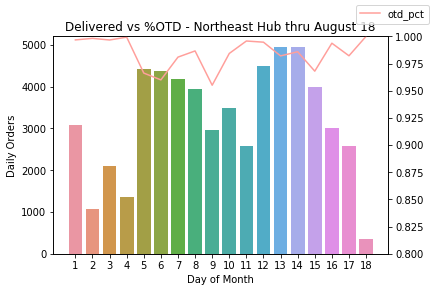

In [271]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Northeast Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14eHubNortheastDelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

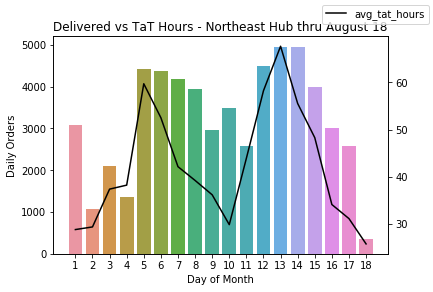

In [272]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Northeast Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14eHubNortheastDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

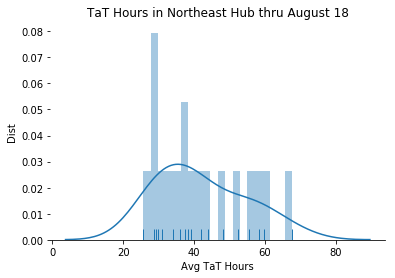

In [274]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Northeast Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14eHubNortheastTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	Northwest Hub by Month 2019

In [275]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Northwest Hub" # Quezon City, Metro Manila

sum_MM14w = query_to_bq2(sql_hub_sum)
sum_MM14w.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,1388,0.989193,38.325648
1,2019-08-01,Northeast Hub,Quad-X,48179,0.979037,47.168248
2,2019-08-01,Northwest Hub,Quad-X,36134,0.989788,41.466347


In [276]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Northwest Hub" # Quezon City, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Quezon City MM14,MM14,633,0.99842,25.436019
1,2019-08-01,Valenzuela City MM17,MM17,443,1.00000,25.354402
2,2019-08-01,Caloocan City MM01,MM01,342,1.00000,24.283626
3,2019-08-01,Malabon City MM04,MM04,241,1.00000,29.406639
4,2019-08-01,Meycauayan City BC13,BC13,100,1.00000,22.780000


In [277]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
95,2019-08-18,Quezon City MM14,MM14,26,0.923077,44.230769
96,2019-08-18,Navotas City MM09,MM09,15,1.000000,28.133333
97,2019-08-18,Valenzuela City MM17,MM17,12,1.000000,29.750000
98,2019-08-18,Malabon City MM04,MM04,7,1.000000,19.285714
99,2019-08-18,Caloocan City MM01,MM01,1,1.000000,43.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

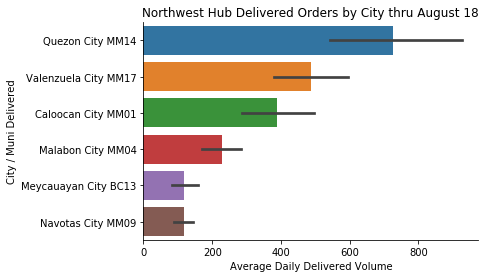

In [279]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Northwest Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14wHubDelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

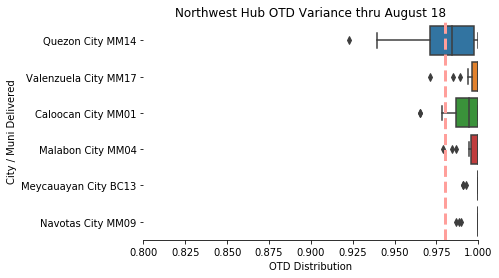

In [280]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Northwest Hub OTD Variance thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14wHubOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [281]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Northwest Hub" # Quezon City, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,1825,0.999452,25.571507
1,2019-08-02,2,5-Fri,1154,0.999133,27.373484
2,2019-08-03,3,6-Sat,732,0.982240,31.424863
3,2019-08-04,4,7-Sun,222,1.000000,31.653153
4,2019-08-05,5,1-Mon,3857,0.983925,61.150376


In [282]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
16,2019-08-17,17,6-Sat,1366,0.964861,30.642753
17,2019-08-18,18,7-Sun,61,0.967213,34.540984
14,2019-08-15,15,4-Thu,2074,0.977338,38.404050
5,2019-08-06,6,2-Tue,3442,0.980825,40.699884
2,2019-08-03,3,6-Sat,732,0.982240,31.424863


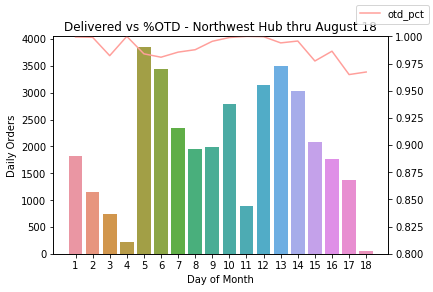

In [283]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Northwest Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14wHubDelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

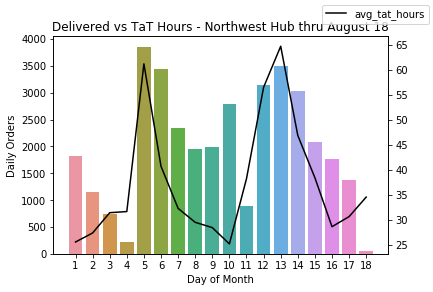

In [284]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Northwest Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14wHubDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

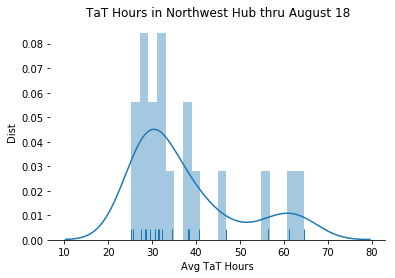

In [286]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Northwest Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM14wHubNorthwestTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	South Hub by Month 2019

In [287]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "South Hub" # Paranaque City, Metro Manila

sum_MM02 = query_to_bq2(sql_hub_sum)
sum_MM02.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,546,0.987179,45.813187
1,2019-08-01,South Hub,Quad-X,26003,0.987463,45.648310


In [288]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "South Hub" # Paranaque City, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()


,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Paranaque City MM10,MM10,669,1.000000,28.343797
1,2019-08-01,Las Pinas City MM02,MM02,521,1.000000,28.249520
2,2019-08-01,Bacoor City CV03,CV03,189,1.000000,33.682540
3,2019-08-02,Paranaque City MM10,MM10,306,1.000000,27.565359
4,2019-08-02,Las Pinas City MM02,MM02,258,0.996124,36.027132


In [289]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
48,2019-08-17,Las Pinas City MM02,MM02,496,0.995968,30.084677
49,2019-08-17,Bacoor City CV03,CV03,143,1.000000,32.202797
50,2019-08-18,Las Pinas City MM02,MM02,117,1.000000,25.068376
51,2019-08-18,Paranaque City MM10,MM10,27,1.000000,23.333333
52,2019-08-18,Bacoor City CV03,CV03,3,1.000000,27.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

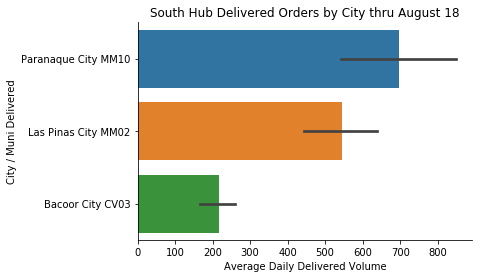

In [291]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

vol.set_title("South Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM02HubSouthDelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

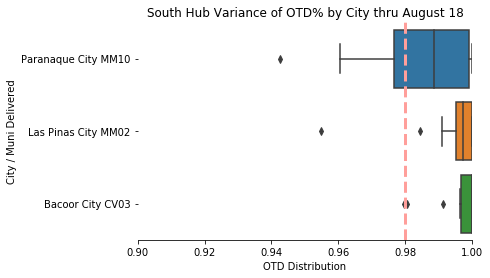

In [292]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("South Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM02HubSouthOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [293]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "South Hub" # Paranaque City, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,1379,1.000000,29.039884
1,2019-08-02,2,5-Fri,628,0.998408,32.936306
2,2019-08-03,3,6-Sat,361,1.000000,33.720222
3,2019-08-04,4,7-Sun,918,0.995643,47.755991
4,2019-08-05,5,1-Mon,1961,0.981132,59.424273


In [294]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,2019-08-06,6,2-Tue,2080,0.951923,59.324519
4,2019-08-05,5,1-Mon,1961,0.981132,59.424273
9,2019-08-10,10,6-Sat,1684,0.982779,34.166271
12,2019-08-13,13,2-Tue,2303,0.984368,62.922275
8,2019-08-09,9,5-Fri,1642,0.984775,40.158952


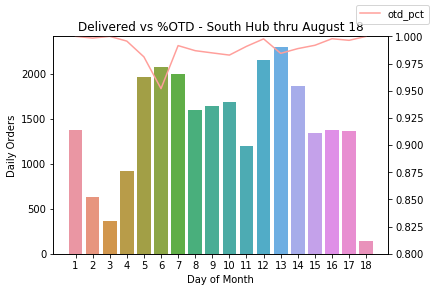

In [295]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - South Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM02HubSouthDelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

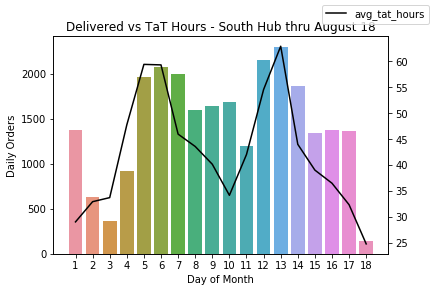

In [296]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - South Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM02HubSouthDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

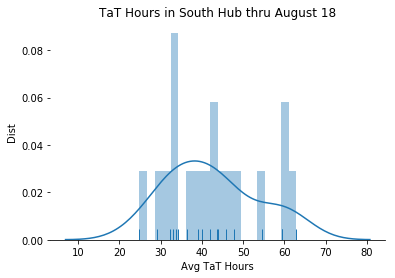

In [298]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in South Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM02HubSouthTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### West Hub by Month 2019

In [299]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "West Hub" # Manila, Metro Manila

sum_MM06 = query_to_bq2(sql_hub_sum)
sum_MM06.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,373,0.975871,45.190349
1,2019-08-01,West Hub,Quad-X,25052,0.991817,38.750918


In [300]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "West Hub" # Manila, Metro Manila

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Manila MM06,MM06,1309,1.000000,26.124523
1,2019-08-02,Manila MM06,MM06,443,1.000000,28.984199
2,2019-08-03,Manila MM06,MM06,527,1.000000,33.713472
3,2019-08-04,Manila MM06,MM06,884,0.995475,47.650452
4,2019-08-05,Manila MM06,MM06,2311,0.958892,58.247512


In [301]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
13,2019-08-14,Manila MM06,MM06,1665,0.992192,37.427628
14,2019-08-15,Manila MM06,MM06,1411,0.997874,32.050319
15,2019-08-16,Manila MM06,MM06,1265,0.997628,28.442688
16,2019-08-17,Manila MM06,MM06,996,1.000000,26.090361
17,2019-08-18,Manila MM06,MM06,174,1.000000,24.982759


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

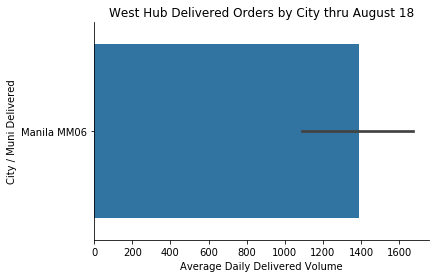

In [303]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("West Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM06HubWestDelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

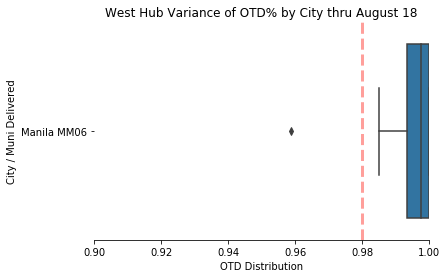

In [304]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("West Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM06HubWestOTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [305]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "West Hub" # Manila, Metro Manila

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,1309,1.000000,26.124523
1,2019-08-02,2,5-Fri,443,1.000000,28.984199
2,2019-08-03,3,6-Sat,527,1.000000,33.713472
3,2019-08-04,4,7-Sun,884,0.995475,47.650452
4,2019-08-05,5,1-Mon,2311,0.958892,58.247512


In [306]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,2019-08-05,5,1-Mon,2311,0.958892,58.247512
5,2019-08-06,6,2-Tue,2202,0.985014,42.010899
12,2019-08-13,13,2-Tue,2377,0.986538,61.776188
13,2019-08-14,14,3-Wed,1665,0.992192,37.427628
6,2019-08-07,7,3-Wed,1831,0.992900,34.994539


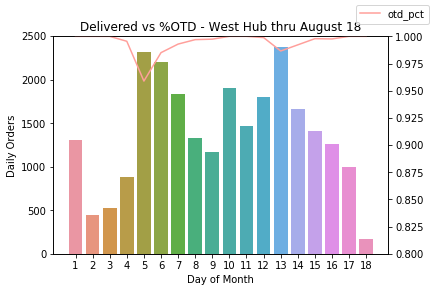

In [307]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - West Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM06HubWestTaTvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

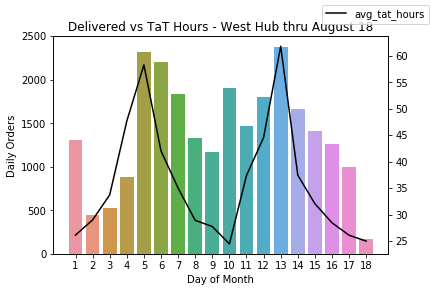

In [308]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - West Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM06HubWestDelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

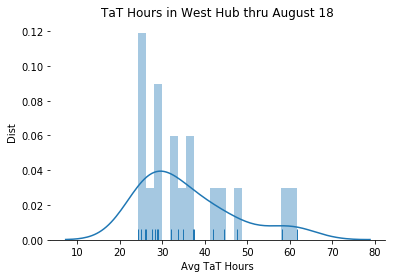

In [310]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in West Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MM06HubWestTaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

## Luzon Hubs

### Angeles01 Hub Hub by Month 2019

In [311]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Angeles01 Hub" # Pampanga Province

sum_PM = query_to_bq2(sql_hub_sum)
sum_PM.head()


,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Angeles01 Hub,Quad-X,7939,0.995465,63.779695
1,2019-08-01,LBC Express,LBC Express,361,0.988920,52.897507


In [312]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Angeles01 Hub" # Pampanga Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Angeles City PM01,PM01,250,1.00000,54.144000
1,2019-08-01,San Fernando City PM16,PM16,123,0.99187,60.975610
2,2019-08-01,Mabalacat City PM09,PM09,94,1.00000,53.414894
3,2019-08-02,Angeles City PM01,PM01,193,1.00000,48.466321
4,2019-08-02,San Fernando City PM16,PM16,116,1.00000,56.534483


In [313]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
40,2019-08-16,San Fernando City PM16,PM16,124,1.000000,55.209677
41,2019-08-16,Mabalacat City PM09,PM09,106,1.000000,55.518868
42,2019-08-17,Angeles City PM01,PM01,211,0.995261,51.781991
43,2019-08-17,San Fernando City PM16,PM16,102,0.990196,48.490196
44,2019-08-17,Mabalacat City PM09,PM09,101,1.000000,50.009901


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

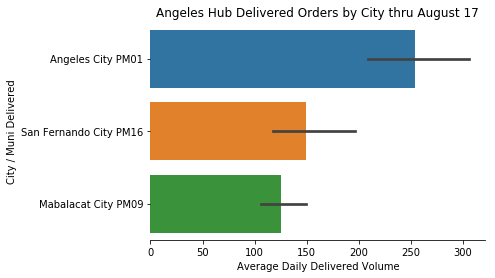

In [315]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Angeles Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubAngeles01DelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

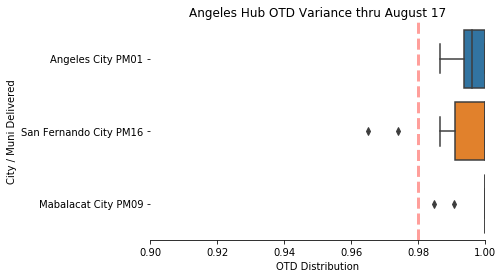

In [316]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Angeles Hub OTD Variance thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubAngeles01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [317]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Angeles01 Hub" # Pampanga Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,467.0,0.997859,55.796574
1,2019-08-02,2,5-Fri,378.0,1.000000,50.973545
2,2019-08-03,3,6-Sat,227.0,0.995595,56.792952
3,2019-08-04,4,7-Sun,NaN,NaN,NaN
4,2019-08-05,5,1-Mon,559.0,0.983900,83.491950


In [318]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,2019-08-05,5,1-Mon,559.0,0.983900,83.491950
6,2019-08-07,7,3-Wed,561.0,0.992870,60.105169
15,2019-08-16,16,5-Fri,451.0,0.993348,55.598670
5,2019-08-06,6,2-Tue,843.0,0.994069,71.118624
7,2019-08-08,8,4-Thu,536.0,0.994403,53.919776


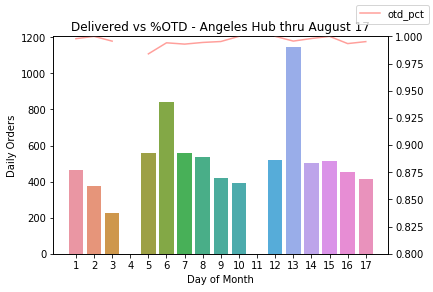

In [319]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Angeles Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubAngeles01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

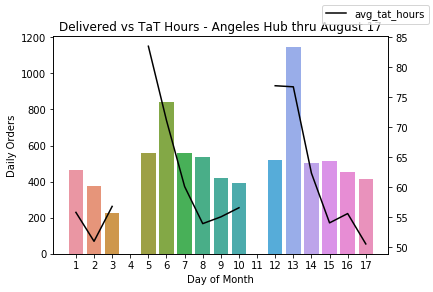

In [320]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Angeles Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubAngeles01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [321]:
# analyze which days contribute to spike in TaT
(otd_day[
    otd_day.avg_tat_hours > 65
]
.sort_values("day_delv")
)

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,2019-08-05,5,1-Mon,559.0,0.983900,83.491950
5,2019-08-06,6,2-Tue,843.0,0.994069,71.118624
11,2019-08-12,12,1-Mon,522.0,1.000000,76.908046
12,2019-08-13,13,2-Tue,1148.0,0.995645,76.729094


In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


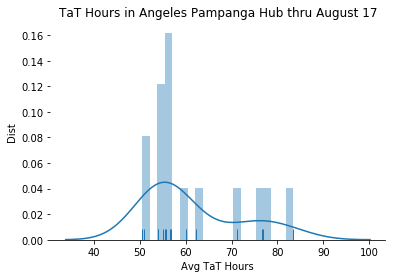

In [323]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Angeles Pampanga Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubAngeles01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### Calamba01 Hub by Month 2019

In [324]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Calamba01 Hub" # Laguna Province

sum_LG = query_to_bq2(sql_hub_sum)
sum_LG.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,240,0.995833,45.475000
1,2019-08-01,Calamba01 Hub,Quad-X,5926,0.991731,70.513669


In [325]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Calamba01 Hub"  # Laguna Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Calamba City LG05,LG05,210,1.0,60.780952
1,2019-08-01,Cabuyao City LG04,LG04,122,1.0,60.098361
2,2019-08-01,Los Banos LG11,LG11,46,1.0,50.695652
3,2019-08-01,Santo Tomas BG28,BG28,39,1.0,55.307692
4,2019-08-02,Calamba City LG05,LG05,154,1.0,54.831169


In [326]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
51,2019-08-16,Santo Tomas BG28,BG28,64,1.000000,56.703125
52,2019-08-16,Cabuyao City LG04,LG04,42,1.000000,61.190476
53,2019-08-17,Cabuyao City LG04,LG04,128,1.000000,64.617187
54,2019-08-17,Calamba City LG05,LG05,93,0.989247,57.881720
55,2019-08-17,Los Banos LG11,LG11,16,1.000000,54.937500


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

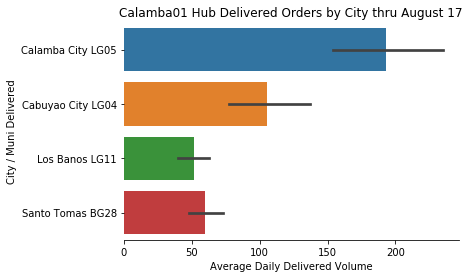

In [328]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Calamba01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LGHubCalamba01DelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

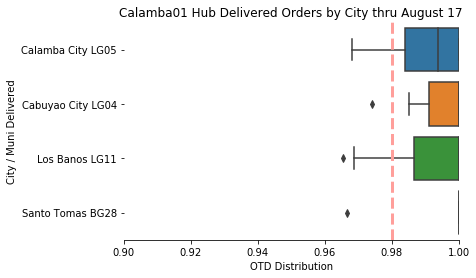

In [329]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Calamba01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LGHubCalamba01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [330]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Calamba01 Hub"  # Laguna Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,417.0,1.000000,58.956835
1,2019-08-02,2,5-Fri,312.0,0.996795,54.948718
2,2019-08-03,3,6-Sat,93.0,1.000000,64.559140
3,2019-08-04,4,7-Sun,NaN,NaN,NaN
4,2019-08-05,5,1-Mon,397.0,0.989924,90.546599


In [331]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,2019-08-06,6,2-Tue,675.0,0.976296,80.531852
6,2019-08-07,7,3-Wed,451.0,0.977827,71.159645
8,2019-08-09,9,5-Fri,268.0,0.985075,60.104478
9,2019-08-10,10,6-Sat,349.0,0.985673,63.613181
7,2019-08-08,8,4-Thu,458.0,0.989083,61.213974


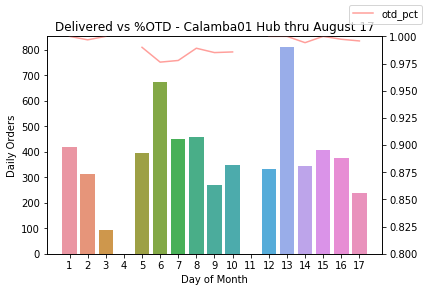

In [332]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Calamba01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LGHubCalamba01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

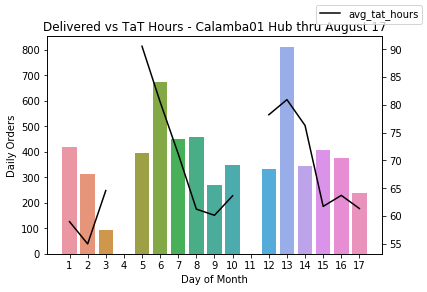

In [333]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Calamba01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LGHubCalamba01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


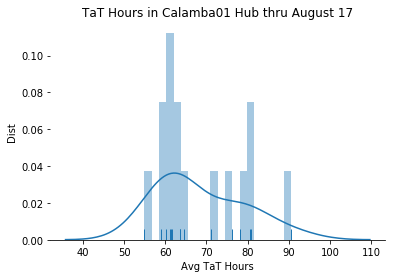

In [335]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Calamba01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LGHubCalamba01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### GenTrias01 Hub by Month 2019

In [336]:
  # Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "GenTrias01 Hub" # Cavite Province

sum_CV = query_to_bq2(sql_hub_sum)
sum_CV.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,GenTrias01 Hub,Quad-X,13129,0.999086,39.275345
1,2019-08-01,LBC Express,LBC Express,524,0.984733,49.036260


In [337]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "GenTrias01 Hub" # Cavite Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Imus City CV10,CV10,197,1.0,26.634518
1,2019-08-01,Dasmarinas City CV06,CV06,195,1.0,23.425641
2,2019-08-01,General Trias City CV09,CV09,139,1.0,31.841727
3,2019-08-01,Tanza CV21,CV21,52,1.0,23.788462
4,2019-08-01,Trece Martires City CV23,CV23,49,1.0,27.224490


In [338]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
125,2019-08-17,Cavite City CV05,CV05,29,0.965517,33.344828
126,2019-08-17,Rosario CV18,CV18,18,1.000000,23.777778
127,2019-08-17,Kawit CV12,CV12,17,1.000000,29.117647
128,2019-08-17,Noveleta CV17,CV17,16,1.000000,26.500000
129,2019-08-18,Cavite City CV05,CV05,2,1.000000,102.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

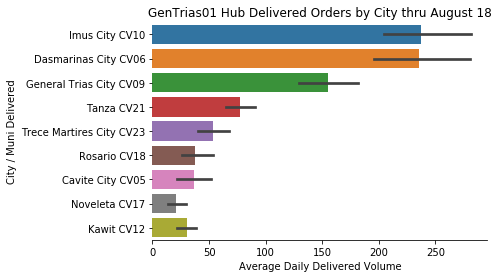

In [340]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("GenTrias01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "CVHubGenTrias01DelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

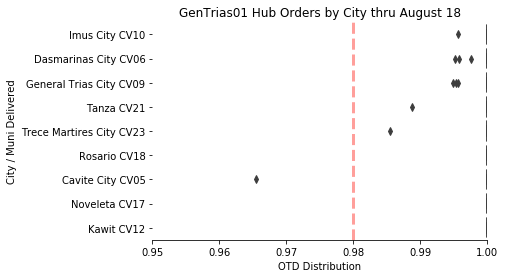

In [341]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("GenTrias01 Hub Orders by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.95, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "CVHubGenTrias01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [342]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "GenTrias01 Hub" # Cavite Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,735.0,1.00000,27.180952
1,2019-08-02,2,5-Fri,466.0,1.00000,28.287554
2,2019-08-03,3,6-Sat,489.0,1.00000,32.969325
3,2019-08-04,4,7-Sun,NaN,NaN,NaN
4,2019-08-05,5,1-Mon,1493.0,0.99933,53.825184


In [343]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
7,2019-08-08,8,4-Thu,853.0,0.996483,32.148886
6,2019-08-07,7,3-Wed,936.0,0.996795,36.464744
12,2019-08-13,13,2-Tue,1246.0,0.998395,56.820225
16,2019-08-17,17,6-Sat,634.0,0.998423,25.817035
9,2019-08-10,10,6-Sat,763.0,0.998689,29.246396


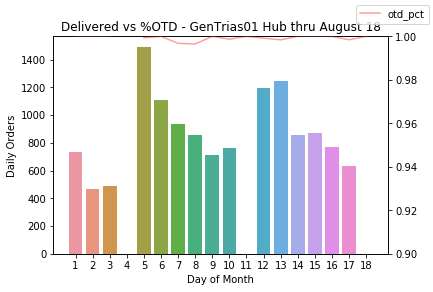

In [344]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.9, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - GenTrias01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "CVHubGenTrias01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

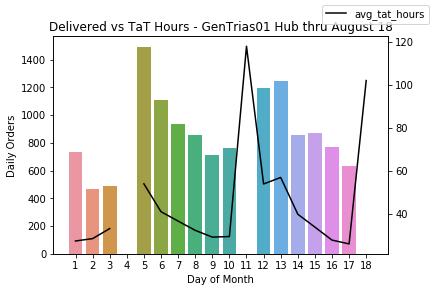

In [345]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - GenTrias01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "CVHubGenTrias01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [346]:
# Analyzing the spikes above average TaT -- which happens mostly on Mondays due to no Sunday deliveries
(otd_day[
    otd_day.avg_tat_hours > 35
]
.sort_values(['day_delv'])
)

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,2019-08-05,5,1-Mon,1493.0,0.999330,53.825184
5,2019-08-06,6,2-Tue,1107.0,1.000000,40.841012
6,2019-08-07,7,3-Wed,936.0,0.996795,36.464744
10,2019-08-11,11,7-Sun,1.0,1.000000,118.000000
11,2019-08-12,12,1-Mon,1194.0,0.999162,53.768844
12,2019-08-13,13,2-Tue,1246.0,0.998395,56.820225
13,2019-08-14,14,3-Wed,857.0,1.000000,39.672112
17,2019-08-18,18,7-Sun,2.0,1.000000,102.000000


In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


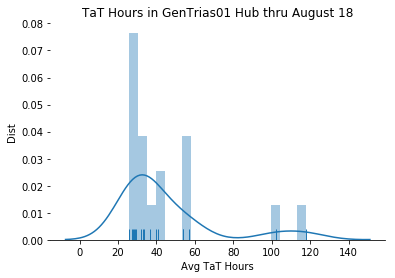

In [348]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in GenTrias01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "CVHubGenTrias01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	SanPedro01 Hub by Month 2019

In [349]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "SanPedro01 Hub" # Laguna Province

sum_LG25 = query_to_bq2(sql_hub_sum)
sum_LG25.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,SanPedro01 Hub,Quad-X,16828,0.995662,37.577906
1,2019-08-01,LBC Express,LBC Express,485,0.977320,47.971134


In [350]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "SanPedro01 Hub" # Laguna Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Muntinlupa City MM08,MM08,407,1.000000,25.432432
1,2019-08-01,Santa Rosa City LG28,LG28,145,0.993103,29.620690
2,2019-08-01,Binan City LG03,LG03,96,1.000000,27.375000
3,2019-08-01,San Pedro City LG25,LG25,77,1.000000,23.818182
4,2019-08-01,Silang CV19,CV19,57,1.000000,22.491228


In [351]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
118,2019-08-18,Santa Rosa City LG28,LG28,24,1.0,23.250000
119,2019-08-18,Carmona CV04,CV04,19,1.0,23.578947
120,2019-08-18,San Pedro City LG25,LG25,19,1.0,33.368421
121,2019-08-18,Binan City LG03,LG03,13,1.0,20.461538
122,2019-08-18,Gen. Mariano Alvarez CV07,CV07,9,1.0,39.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

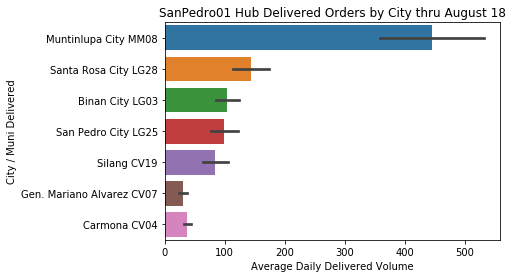

In [353]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("SanPedro01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LG25HubSanPedro01DelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

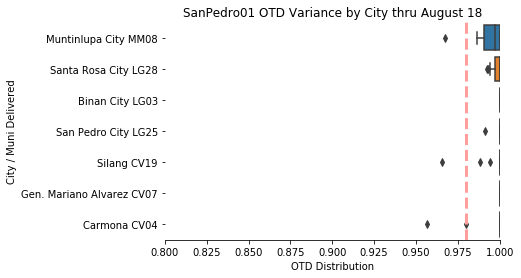

In [354]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("SanPedro01 OTD Variance by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LG25HubSanPedro01OTDvar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [355]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "SanPedro01 Hub" # Laguna Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,849,0.998822,25.846879
1,2019-08-02,2,5-Fri,395,1.000000,28.794937
2,2019-08-03,3,6-Sat,422,1.000000,35.618483
3,2019-08-04,4,7-Sun,954,0.996855,43.817610
4,2019-08-05,5,1-Mon,1358,0.992636,50.322533


In [356]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,2019-08-06,6,2-Tue,1394,0.984935,40.000717
15,2019-08-16,16,5-Fri,893,0.992161,32.530795
7,2019-08-08,8,4-Thu,1035,0.992271,30.885990
4,2019-08-05,5,1-Mon,1358,0.992636,50.322533
12,2019-08-13,13,2-Tue,1256,0.992834,54.160032


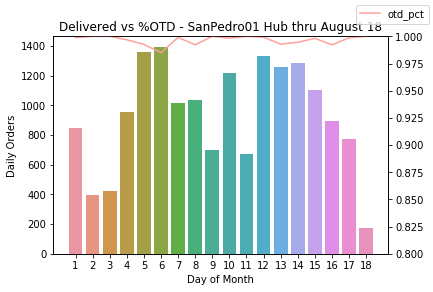

In [357]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - SanPedro01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LG25HubSanPedro01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

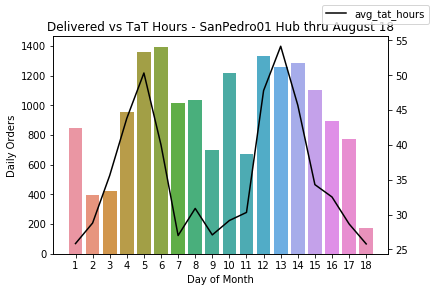

In [358]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - SanPedro01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LG25HubSanPedro01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

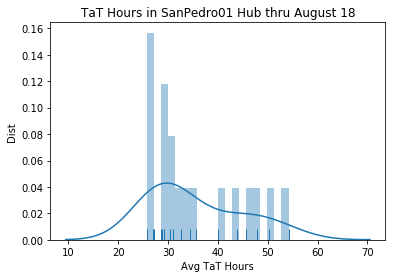

In [360]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in SanPedro01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "LG25HubSanPedro01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	Urdaneta01 Hub by Month 2019

In [361]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Urdaneta01 Hub" # Pangasinan Province

sum_PG = query_to_bq2(sql_hub_sum)
sum_PG.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours


In [362]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Urdaneta01 Hub" # Pangasinan Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours


In [363]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Urdaneta01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubUrdaneta01DelOrder" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Urdaneta01 Hub Pangasinan Orders by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubUrdaneta01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Urdaneta01 Hub" # Pangasinan Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

In [0]:
otd_day.sort_values('otd_pct').head()

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Urdaneta01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubUrdaneta01DelOrders" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Urdaneta01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubUrdaneta01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

In [0]:
# Plot Volume of Orders / Week
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Urdaneta01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "PMHubUrdaneta01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

## Visayas Hubs

### Bacolod01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
# -- ('NC01','NC02','NC20','NC27','NC29')
# -- compare cities in Bacolod City, Bago City, Murcia, Silay City, Talisay City
hub_input = "Bacolod01 Hub" # Negros Occidental Province

sum_NC = query_to_bq2(sql_hub_sum)
sum_NC.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Bacolod01 Hub,Quad-X,7559,0.993385,85.502447
1,2019-08-01,LBC Express,LBC Express,607,0.963756,90.878089


In [0]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Bacolod01 Hub" # Negros Occidental Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Bacolod City NC01,NC01,380,1.0,52.023684
1,2019-08-01,Silay City NC27,NC27,66,1.0,70.424242
2,2019-08-01,Bago City NC02,NC02,41,1.0,54.146341
3,2019-08-01,Talisay City NC29,NC29,35,1.0,51.142857
4,2019-08-01,Murcia NC20,NC20,19,1.0,66.052632


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
44,2019-08-16,Murcia NC20,NC20,38,0.973684,85.421053
45,2019-08-16,Bago City NC02,NC02,37,1.000000,88.405405
46,2019-08-16,Silay City NC27,NC27,37,1.000000,83.567568
47,2019-08-16,Talisay City NC29,NC29,34,0.970588,94.617647
48,2019-08-16,Victorias City NC32,NC32,18,1.000000,49.166667


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

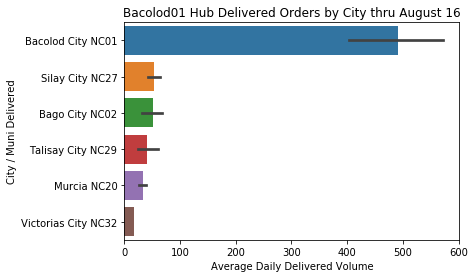

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Bacolod01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelOrdersBacolod01HubNC" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

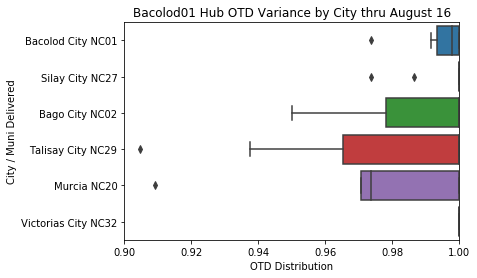

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Bacolod01 Hub OTD Variance by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "OTDVarBacolod01HubNC" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Bacolod01 Hub" # Negros Occidental Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,541,1.000000,54.865065
1,5,1-Mon,778,1.000000,97.464010
2,6,2-Tue,713,0.994390,84.660589
3,7,3-Wed,686,0.997085,96.682216
4,8,4-Thu,695,0.988489,84.289209


In [0]:
otd_day.head(27)

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,541,1.000000,54.865065
1,5,1-Mon,778,1.000000,97.464010
2,6,2-Tue,713,0.994390,84.660589
3,7,3-Wed,686,0.997085,96.682216
4,8,4-Thu,695,0.988489,84.289209
5,9,5-Fri,191,0.979058,104.534031
6,10,6-Sat,648,0.992284,74.307099
7,12,1-Mon,751,0.992011,79.420772
8,13,2-Tue,667,0.994003,96.572714
9,14,3-Wed,733,0.986357,96.068213


In [0]:
otd_day.describe()

,day_delv,order_count,otd_pct,avg_tat_hours
count,12.000000,12.000000,12.000000,12.000000
mean,9.666667,629.916667,0.992577,85.692957
std,4.519319,158.299175,0.006011,13.906497
min,1.000000,191.000000,0.979058,54.865065
25%,6.750000,611.500000,0.989925,78.142354
50%,9.500000,676.500000,0.993143,85.609822
75%,13.250000,718.000000,0.996909,96.600089
max,16.000000,778.000000,1.000000,104.534031


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,9,5-Fri,191,0.979058,104.534031
9,14,3-Wed,733,0.986357,96.068213
4,8,4-Thu,695,0.988489,84.289209
11,16,5-Fri,521,0.990403,72.892514
7,12,1-Mon,751,0.992011,79.420772


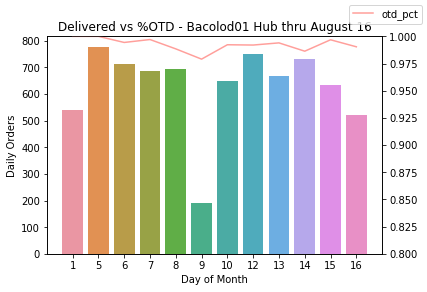

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Bacolod01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsOTDBacolod01HubNC" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

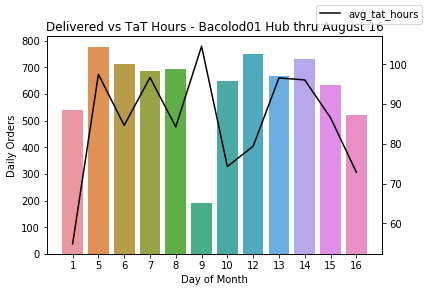

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Bacolod01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsTaTBacolod01HubNC" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

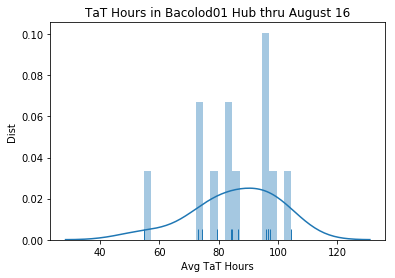

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Bacolod01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "TaTHoursBacolod01HubNC" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### Cebu Central Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
# --  (CE17','CE19','CE20','CE23','CE26','CE27','CE30','CE34','CE50')
# -- compare cities in Cebu City, Consolacion, Cordova, Danao, Lapu-Lapu City, Liloan. Mandaue City, Naga City, Talisay City
hub_input = "CebCentral Hub" # Cebu Province

sum_CE = query_to_bq2(sql_hub_sum)
sum_CE.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,CebCentral Hub,Quad-X,30817,0.996495,77.642957
1,2019-08-01,LBC Express,LBC Express,1665,0.936937,100.204204


In [0]:
#  Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "CebCentral Hub" # Cebu Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Cebu City CE17,CE17,931,1.0,50.622986
1,2019-08-01,Lapu-Lapu City CE26,CE26,314,1.0,50.213376
2,2019-08-01,Mandaue City CE30,CE30,282,1.0,49.347518
3,2019-08-01,Talisay City CE50,CE50,276,1.0,58.467391
4,2019-08-01,Consolacion CE19,CE19,82,1.0,49.914634


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
110,2019-08-16,Naga City CE34,CE34,59,0.762712,188.355932
111,2019-08-16,Liloan CE27,CE27,48,0.979167,77.291667
112,2019-08-16,Danao City CE23,CE23,41,0.975610,81.780488
113,2019-08-16,Cordova CE20,CE20,22,1.000000,124.863636
114,2019-08-16,Compostela CE18,CE18,4,1.000000,52.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

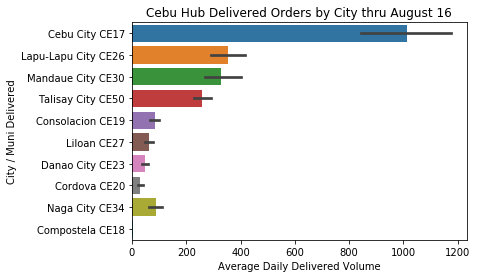

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Cebu Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelOrdersCebuHubCE" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

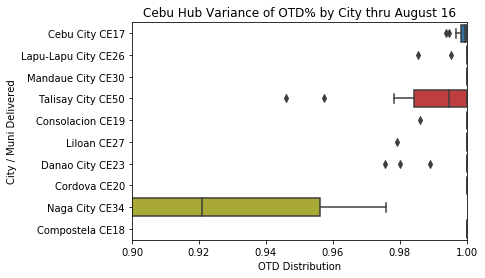

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Cebu Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "OTDVarianceCebuHubCE" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "CebCentral Hub" # Cebu Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,2015,1.000000,51.545409
1,2,5-Fri,1884,0.996815,53.669851
2,3,6-Sat,899,1.000000,54.129032
3,5,1-Mon,2619,1.000000,67.200840
4,6,2-Tue,2373,0.999157,80.438685


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
13,16,5-Fri,2169,0.986169,86.359613
12,15,4-Thu,2413,0.991297,85.686283
8,10,6-Sat,1615,0.991950,72.341796
7,9,5-Fri,1317,0.994685,77.312073
11,14,3-Wed,2801,0.996787,86.927526


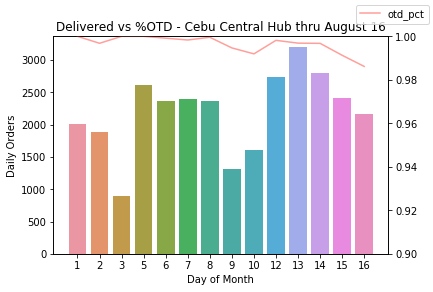

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
plt.ylim((0.9, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Cebu Central Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsOTDCebuHubCE" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

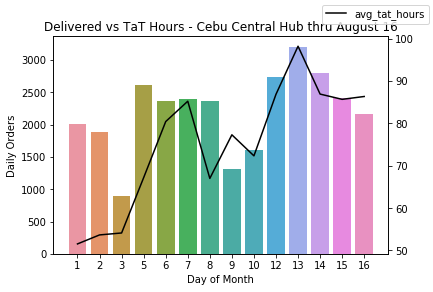

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Cebu Central Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsTaTCebuHubCE" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Analyzing the spikes above average TaT -- which happens mostly on Mondays due to no Sunday deliveries
(otd_day[
    otd_day.avg_tat_hours > 55
]
.sort_values(['day_delv'])
)

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
3,5,1-Mon,2619,1.000000,67.200840
4,6,2-Tue,2373,0.999157,80.438685
5,7,3-Wed,2397,0.998331,85.241552
6,8,4-Thu,2372,0.999578,67.013491
7,9,5-Fri,1317,0.994685,77.312073
8,10,6-Sat,1615,0.991950,72.341796
9,12,1-Mon,2736,0.998173,86.880482
10,13,2-Tue,3207,0.996882,98.224821
11,14,3-Wed,2801,0.996787,86.927526
12,15,4-Thu,2413,0.991297,85.686283


In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

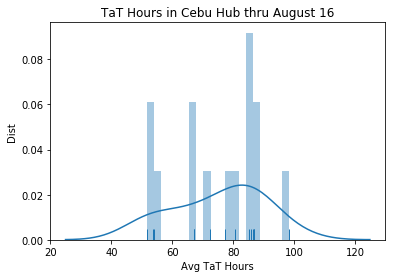

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Cebu Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "TaTHoursCebuHubCE" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	Iloilo01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Iloilo01 Hub" # Iloilo Province

sum_IL = query_to_bq2(sql_hub_sum)
sum_IL.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Iloilo01 Hub,Quad-X,7511,0.958860,118.388097
1,2019-08-01,LBC Express,LBC Express,1038,0.927746,109.237958


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Iloilo01 Hub" # Iloilo Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Iloilo City IL21,IL21,581,0.969019,102.989673
1,2019-08-01,Pavia IL33,IL33,63,1.000000,59.619048
2,2019-08-01,Oton IL31,IL31,43,1.000000,63.604651
3,2019-08-01,Santa Barbara IL40,IL40,18,1.000000,49.500000
4,2019-08-01,Leganes IL24,IL24,2,1.000000,96.500000


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
59,2019-08-16,Iloilo City IL21,IL21,575,0.935652,119.923478
60,2019-08-16,Pavia IL33,IL33,87,0.942529,121.747126
61,2019-08-16,Leganes IL24,IL24,39,0.974359,114.128205
62,2019-08-16,Oton IL31,IL31,24,1.000000,71.083333
63,2019-08-16,Santa Barbara IL40,IL40,21,1.000000,148.571429


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

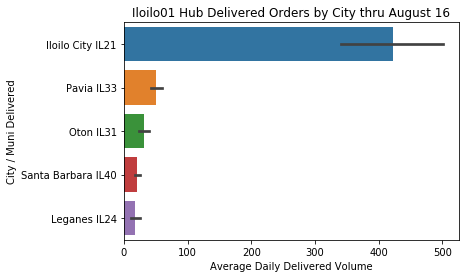

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Iloilo01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelOrdersIloilo01HubIL" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

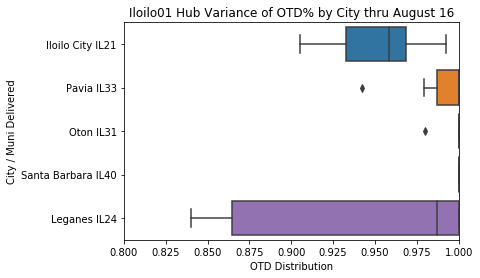

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Iloilo01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "OTDVarIloilo01HubIL" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Iloilo01 Hub" # Iloilo Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,707,0.974540,95.349364
1,2,5-Fri,510,0.968627,76.552941
2,3,6-Sat,202,0.930693,84.925743
3,5,1-Mon,349,0.988539,102.223496
4,6,2-Tue,453,0.969095,111.832230


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
11,14,3-Wed,721,0.920943,149.080444
2,3,6-Sat,202,0.930693,84.925743
6,8,4-Thu,406,0.931034,128.975369
7,9,5-Fri,623,0.939005,128.407705
13,16,5-Fri,746,0.942359,119.068365


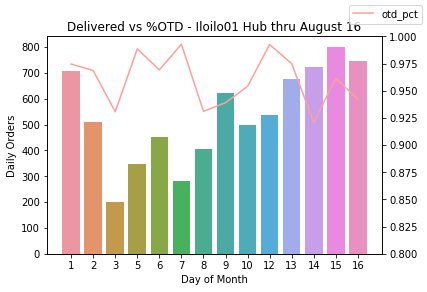

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Iloilo01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsOTDIloilo01HubIL" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

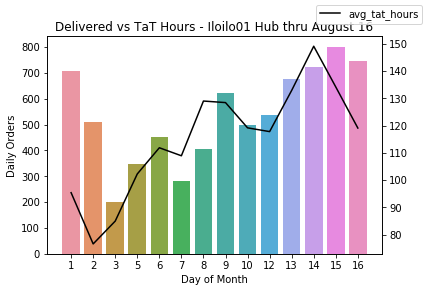

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - Iloilo01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DelvsTaTIloilo01HubIL" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

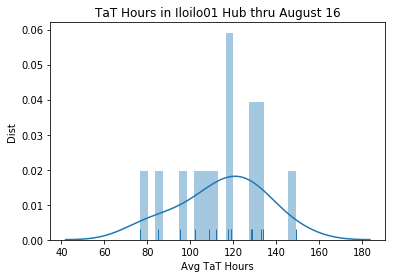

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Iloilo01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "TaTHoursIloilo01HubIL" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
hub_pm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 2019-08-01 to 2019-08-16
Data columns (total 6 columns):
date_delivered         64 non-null object
delivery_city_xcode    64 non-null object
del_xcode              64 non-null object
order_count            64 non-null int64
otd_pct                64 non-null float64
avg_tat_hours          64 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.2 KB


## Mindanao Hubs

### CDO01 Hub by Month 2019

In [0]:
# Run SQL to Analyze Detailed Order Performance Statistics for specific hub (@hub_code) and date (@month)
hub_input = "CDO01 Hub" # Misamis Oriental

hub_mr_orders = query_to_bq2(sql_hub_orders)
hub_mr_orders.head()

,date_delivered,delivery_city_xcode,del_xcode,order_id,delivered_within_sla,delivery_tat_hours
0,2019-08-01,Manolo Fortich BK15,BK15,31896384,1,27
1,2019-08-01,Cagayan de Oro City MR05,MR05,31887613,1,23
2,2019-08-01,Cagayan de Oro City MR05,MR05,31872816,1,26
3,2019-08-01,Cagayan de Oro City MR05,MR05,31870460,1,49
4,2019-08-01,Cagayan de Oro City MR05,MR05,31870380,1,41


In [0]:
# Calculate Median TaT Hours by City
(hub_mr_orders.loc[:, :]
  .groupby(['delivery_city_xcode'])    # 'date_delivered',
  .agg({'delivery_tat_hours' : 'median',
        'order_id' : 'count',
        'delivered_within_sla' : 'mean'}
       )
  .rename(columns={'delivery_tat_hours': 'Median TaT hours', 'delivered_within_sla': 'OTD %', 'order_id' : 'order count'})
  .sort_values('delivery_city_xcode')
  .head(10)
)

,Median TaT hours,order count,OTD %
delivery_city_xcode,,,
Cagayan de Oro City MR05,73,7665,0.994260
El Salvador City MR07,98,284,0.982394
Manolo Fortich BK15,77,1103,0.993654
Opol MR20,77,504,0.986111
Villanueva MR25,71,428,1.000000


In [0]:
# Calculate Median TaT Hours by City Delivery was beyond SLA
(hub_mr_orders.loc[hub_mr_orders.delivered_within_sla == 0, :]
  .groupby(['delivery_city_xcode'])    # 'date_delivered',
  .agg({'delivery_tat_hours' : {'min','median','max'}}
       )
  .sort_values('delivery_city_xcode')
  .head(10)
)

delivery_tat_hours          
                                     median  max  min
delivery_city_xcode                                  
Cagayan de Oro City MR05              237.5  743  190
El Salvador City MR07                 197.0  216  194
Manolo Fortich BK15                   221.0  315  197
Opol MR20                             268.0  318  222

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "CDO01 Hub" # Misamis Oriental

sum_MR = query_to_bq2(sql_hub_sum)
sum_MR.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,CDO01 Hub,Quad-X,9984,0.993690,85.172276
1,2019-08-01,LBC Express,LBC Express,340,0.926471,92.711765


In [0]:
sum_MR.loc[0, 'Median TaT Hours'] = hub_mr_orders.delivery_tat_hours.median()
sum_MR.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours,Median TaT Hours
0,2019-08-01,CDO01 Hub,Quad-X,9984,0.993690,85.172276,74.0
1,2019-08-01,LBC Express,LBC Express,340,0.926471,92.711765,NaN


In [0]:
hub_mr_orders.shape

(9984, 6)

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "CDO01 Hub" # Misamis Oriental

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Cagayan de Oro City MR05,MR05,564,1.0,63.253546
1,2019-08-01,Opol MR20,MR20,58,1.0,90.982759
2,2019-08-01,Manolo Fortich BK15,BK15,33,1.0,72.606061
3,2019-08-01,Villanueva MR25,MR25,13,1.0,70.000000
4,2019-08-01,El Salvador City MR07,MR07,13,1.0,93.153846


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

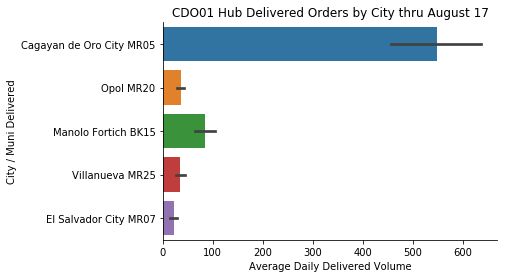

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("CDO01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)


# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MRHubCDO01DayDel" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

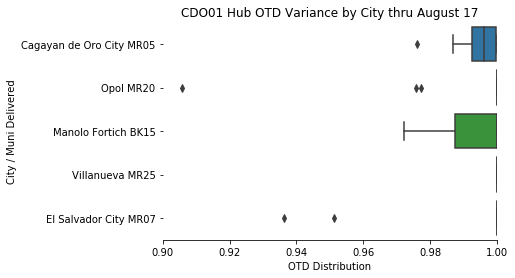

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("CDO01 Hub OTD Variance by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MRHubCDO01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "CDO01 Hub" # Misamis Oriental

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,681.0,1.000000,66.767988
1,2019-08-02,2,5-Fri,NaN,NaN,NaN
2,2019-08-03,3,6-Sat,811.0,0.997534,74.418002
3,2019-08-04,4,7-Sun,NaN,NaN,NaN
4,2019-08-05,5,1-Mon,936.0,0.996795,90.120726


In [0]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
15,2019-08-16,16,5-Fri,701.0,0.980029,85.116976
6,2019-08-07,7,3-Wed,713.0,0.984572,90.666199
16,2019-08-17,17,6-Sat,459.0,0.989107,82.446623
14,2019-08-15,15,4-Thu,586.0,0.989761,84.488055
13,2019-08-14,14,3-Wed,1035.0,0.992271,107.346860


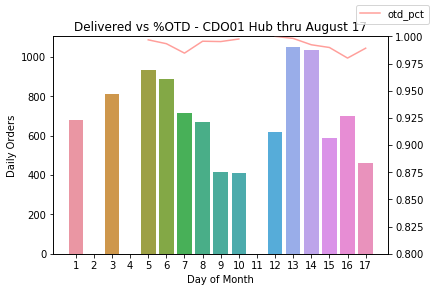

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - CDO01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MRHubCDO01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

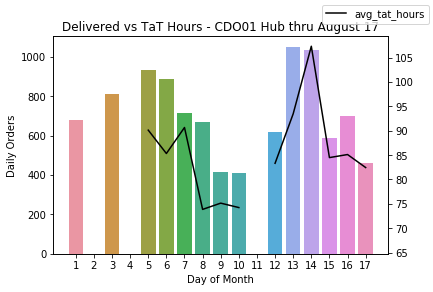

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours - CDO01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MRHubCDO01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


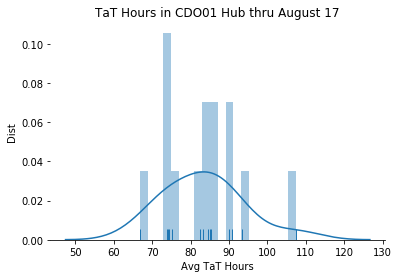

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in CDO01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "MRHubCDO01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### Carcar01 hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Carcar01 hub" # Cebu Province

sum_CE14 = query_to_bq2(sql_hub_sum)
sum_CE14.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,11,1.0,81.909091
1,2019-08-01,Carcar01 hub,Quad-X,193,1.0,77.647668


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Carcar01 hub" # Cebu Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Carcar City CE14,CE14,26,1.0,54.076923
1,2019-08-02,Carcar City CE14,CE14,30,1.0,53.233333
2,2019-08-05,Carcar City CE14,CE14,46,1.0,88.673913
3,2019-08-06,Carcar City CE14,CE14,51,1.0,80.764706
4,2019-08-08,Carcar City CE14,CE14,40,1.0,94.625000


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Carcar City CE14,CE14,26,1.0,54.076923
1,2019-08-02,Carcar City CE14,CE14,30,1.0,53.233333
2,2019-08-05,Carcar City CE14,CE14,46,1.0,88.673913
3,2019-08-06,Carcar City CE14,CE14,51,1.0,80.764706
4,2019-08-08,Carcar City CE14,CE14,40,1.0,94.625000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

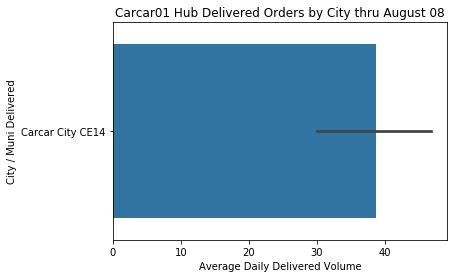

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Carcar01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

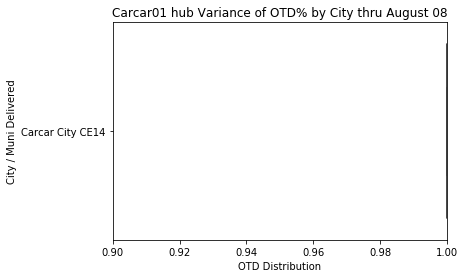

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Carcar01 hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Carcar01 hub" # Cebu Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,26,1.0,54.076923
1,2,5-Fri,30,1.0,53.233333
2,5,1-Mon,46,1.0,88.673913
3,6,2-Tue,51,1.0,80.764706
4,8,4-Thu,40,1.0,94.625000


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,26,1.0,54.076923
1,2,5-Fri,30,1.0,53.233333
2,5,1-Mon,46,1.0,88.673913
3,6,2-Tue,51,1.0,80.764706
4,8,4-Thu,40,1.0,94.625000


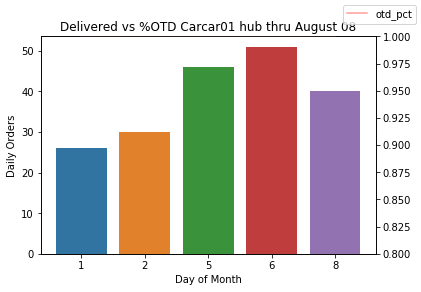

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Carcar01 hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

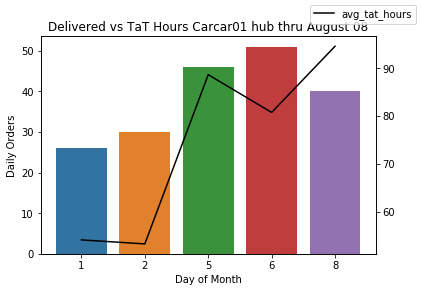

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Carcar01 hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

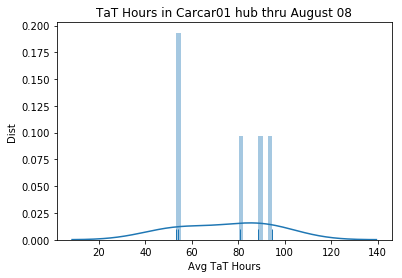

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Carcar01 hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()

### Davao01 Hub by Month 2019

In [0]:
# Run SQL to Analyze Detailed Order Performance Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Davao01 Hub" # Davao del Sur Province

hub_ds_orders = query_to_bq2(sql_hub_orders)
hub_ds_orders.head()

,date_delivered,delivery_city_xcode,del_xcode,order_id,delivered_within_sla,delivery_tat_hours
0,2019-08-01,Davao City DS02,DS02,31913312,1,19
1,2019-08-01,Davao City DS02,DS02,31913298,1,19
2,2019-08-01,Davao City DS02,DS02,31911604,1,23
3,2019-08-01,Davao City DS02,DS02,31911573,1,22
4,2019-08-01,Davao City DS02,DS02,31910422,1,22


In [0]:
hub_ds_orders.shape

(14265, 6)

In [0]:
# Calculate Median TaT Hours by City
(hub_ds_orders.loc[:, :]               # hub_ds_orders.delivered_within_sla == 1
  .groupby(['delivery_city_xcode'])    # 'date_delivered',
  .agg({'delivery_tat_hours' : 'median',
        'order_id' : 'count',
        'delivered_within_sla' : 'mean'}
       )
  .rename(columns={'delivery_tat_hours': 'Median TaT hours', 'delivered_within_sla': 'OTD %', 'order_id' : 'order count'})
  .sort_values('delivery_city_xcode')
  .head(10)
)

,Median TaT hours,order count,OTD %
delivery_city_xcode,,,
Davao City DS02,69,14265,0.998177


In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Davao01 Hub" # Davao del Sur Province

sum_DS = query_to_bq2(sql_hub_sum)
sum_DS.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,483,0.915114,114.937888
1,2019-08-01,Davao01 Hub,Quad-X,14265,0.998177,74.713635


In [0]:
sum_DS.loc[1, 'Median TaT Hours'] = hub_ds_orders.delivery_tat_hours.median()
sum_DS.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours,Median TaT Hours
0,2019-08-01,LBC Express,LBC Express,483,0.915114,114.937888,NaN
1,2019-08-01,Davao01 Hub,Quad-X,14265,0.998177,74.713635,69.0


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Davao01 Hub" # Davao del Sur Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Davao City DS02,DS02,895,1.000000,55.370950
1,2019-08-02,Davao City DS02,DS02,899,1.000000,52.320356
2,2019-08-03,Davao City DS02,DS02,473,0.997886,56.627907
3,2019-08-05,Davao City DS02,DS02,867,1.000000,81.550173
4,2019-08-06,Davao City DS02,DS02,1563,1.000000,72.162508


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
4,2019-08-06,Davao City DS02,DS02,1563,1.000000,72.162508
5,2019-08-07,Davao City DS02,DS02,905,1.000000,80.469613
6,2019-08-08,Davao City DS02,DS02,1138,0.999121,60.312830
7,2019-08-09,Davao City DS02,DS02,381,1.000000,84.808399
8,2019-08-10,Davao City DS02,DS02,808,0.993812,67.214109


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

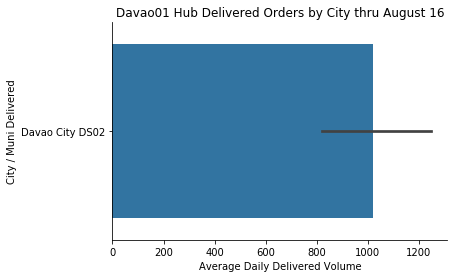

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Davao01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DSHubDavao01DailyDel" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

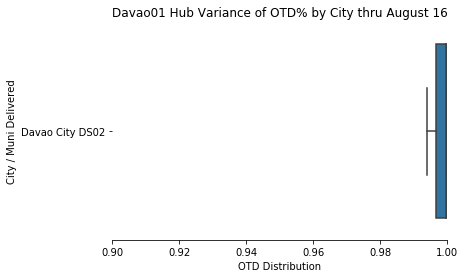

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Davao01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DSHubDavao01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Davao01 Hub" # Davao del Sur Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,895,1.000000,55.370950
1,2,5-Fri,899,1.000000,52.320356
2,3,6-Sat,473,0.997886,56.627907
3,5,1-Mon,867,1.000000,81.550173
4,6,2-Tue,1563,1.000000,72.162508


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
8,10,6-Sat,808,0.993812,67.214109
11,14,3-Wed,1548,0.994186,90.043282
12,15,4-Thu,1095,0.994521,74.379909
13,16,5-Fri,815,0.996319,61.688344
2,3,6-Sat,473,0.997886,56.627907


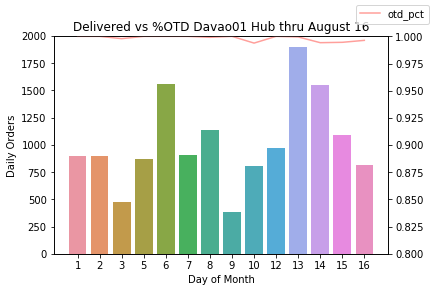

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Davao01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DSHubDavao01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

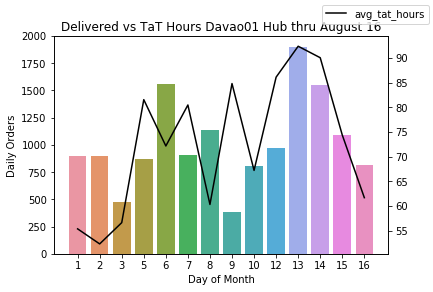

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Davao01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DSHubDavao01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

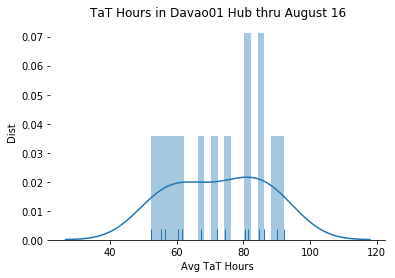

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Davao01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "DSHubDavao01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### Digos01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Digos01 Hub" # Davao del Sur Province

sum_DS03 = query_to_bq2(sql_hub_sum)
sum_DS03.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Digos01 Hub,Quad-X,204,0.941176,103.799020
1,2019-08-01,LBC Express,LBC Express,22,0.818182,138.227273


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Digos01 Hub" # Davao del Sur Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Digos City DS03,DS03,49,1.000000,61.918367
1,2019-08-02,Digos City DS03,DS03,29,1.000000,59.482759
2,2019-08-05,Digos City DS03,DS03,48,1.000000,94.083333
3,2019-08-06,Digos City DS03,DS03,28,0.964286,90.142857
4,2019-08-08,Digos City DS03,DS03,45,0.755556,196.244444


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
1,2019-08-02,Digos City DS03,DS03,29,1.000000,59.482759
2,2019-08-05,Digos City DS03,DS03,48,1.000000,94.083333
3,2019-08-06,Digos City DS03,DS03,28,0.964286,90.142857
4,2019-08-08,Digos City DS03,DS03,45,0.755556,196.244444
5,2019-08-09,Digos City DS03,DS03,5,1.000000,109.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

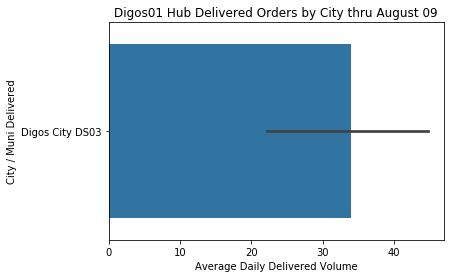

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Digos01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

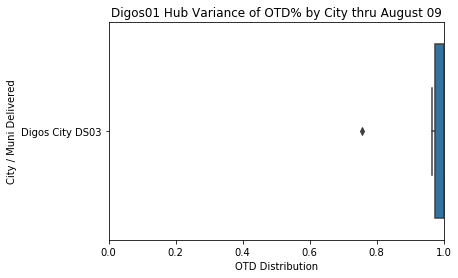

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Digos01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.0, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Digos01 Hub" # Davao del Sur Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,49,1.000000,61.918367
1,2,5-Fri,29,1.000000,59.482759
2,5,1-Mon,48,1.000000,94.083333
3,6,2-Tue,28,0.964286,90.142857
4,8,4-Thu,45,0.755556,196.244444


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
4,8,4-Thu,45,0.755556,196.244444
3,6,2-Tue,28,0.964286,90.142857
0,1,4-Thu,49,1.000000,61.918367
1,2,5-Fri,29,1.000000,59.482759
2,5,1-Mon,48,1.000000,94.083333


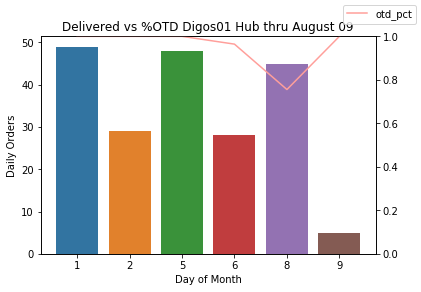

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Digos01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

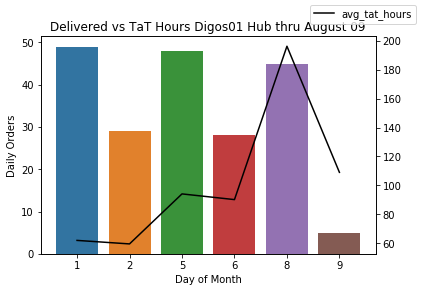

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Digos01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

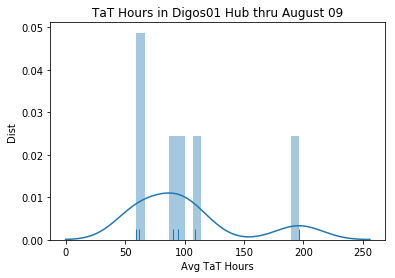

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Digos01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()

### GenSan01 Hub by Month 2019

In [0]:
# Run SQL to Analyze Detailed Order Performance Statistics for specific hub (@hub_code) and date (@month)
hub_input = "GenSan01 Hub" # South Cotobato Province

hub_sc_orders = query_to_bq2(sql_hub_orders)
hub_sc_orders.head()

,date_delivered,delivery_city_xcode,del_xcode,order_id,delivered_within_sla,delivery_tat_hours
0,2019-08-01,General Santos City SC02,SC02,31870698,1,46
1,2019-08-01,Polomolok SC06,SC06,31870576,1,49
2,2019-08-01,General Santos City SC02,SC02,31870272,1,42
3,2019-08-01,Polomolok SC06,SC06,31870250,1,44
4,2019-08-01,General Santos City SC02,SC02,31869880,1,42


In [0]:
# Calculate Median TaT Hours by City
(hub_sc_orders.loc[hub_sc_orders.delivered_within_sla == 0, :]               # hub_sc_orders.delivered_within_sla == 1
  .groupby(['delivery_city_xcode'])    # 'date_delivered',
  .agg({'delivery_tat_hours' : 'median',
        'order_id' : 'count',
        'delivered_within_sla' : 'mean'}
       )
  .rename(columns={'delivery_tat_hours': 'Median TaT hours', 'delivered_within_sla': 'OTD %', 'order_id' : 'order count'})
  .sort_values('delivery_city_xcode')
  .head(10)
)

,Median TaT hours,order count,OTD %
delivery_city_xcode,,,
General Santos City SC02,212,19,0
Polomolok SC06,208,1,0


In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "GenSan01 Hub" # South Cotobato Province

sum_SC = query_to_bq2(sql_hub_sum)
sum_SC.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,231,0.822511,163.372294
1,2019-08-01,GenSan01 Hub,Quad-X,14892,0.998657,63.511013


In [0]:
# Calculate Median TaT Hours and append to Summary Hub Stats to compare with Avg TaT Hours
sum_SC.loc[1, 'Median TaT Hours'] = hub_ds_orders.delivery_tat_hours.median()
sum_SC.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours,Median TaT Hours
0,2019-08-01,LBC Express,LBC Express,231,0.822511,163.372294,NaN
1,2019-08-01,GenSan01 Hub,Quad-X,14892,0.998657,63.511013,69.0


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "GenSan01 Hub" # South Cotobato Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,General Santos City SC02,SC02,915,0.998907,51.949727
1,2019-08-01,Polomolok SC06,SC06,122,1.000000,48.172131
2,2019-08-02,General Santos City SC02,SC02,797,1.000000,48.884567
3,2019-08-02,Polomolok SC06,SC06,118,1.000000,48.703390
4,2019-08-03,General Santos City SC02,SC02,487,1.000000,53.675565


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
24,2019-08-15,General Santos City SC02,SC02,941,0.996812,67.846971
25,2019-08-15,Polomolok SC06,SC06,154,1.000000,74.175325
26,2019-08-16,General Santos City SC02,SC02,782,1.000000,52.423274
27,2019-08-16,Polomolok SC06,SC06,102,1.000000,52.735294
28,2019-08-17,General Santos City SC02,SC02,1,1.000000,43.000000


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

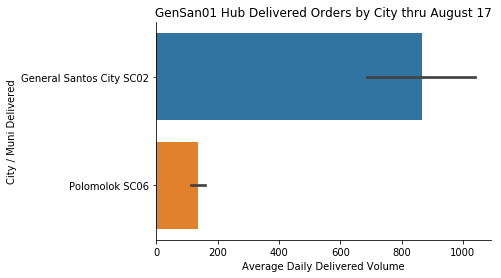

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("GenSan01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SCHubGenSan01DailyDel" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

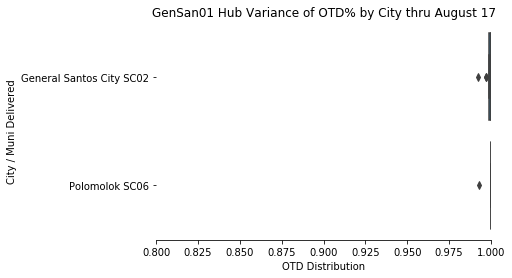

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("GenSan01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.8, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SCHubGenSan01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "GenSan01 Hub" # South Cotobato Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,1037,0.999036,51.505304
1,2,5-Fri,915,1.000000,48.861202
2,3,6-Sat,539,1.000000,54.363636
3,5,1-Mon,1245,0.999197,78.992771
4,6,2-Tue,1659,1.000000,67.083183


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
11,14,3-Wed,1321,0.992430,92.526117
6,8,4-Thu,1064,0.997180,50.946429
12,15,4-Thu,1095,0.997260,68.736986
0,1,4-Thu,1037,0.999036,51.505304
5,7,3-Wed,1039,0.999038,56.228104


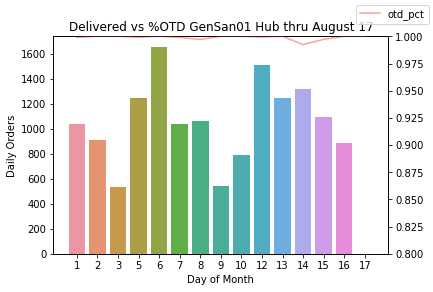

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD GenSan01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SCHubGenSan01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

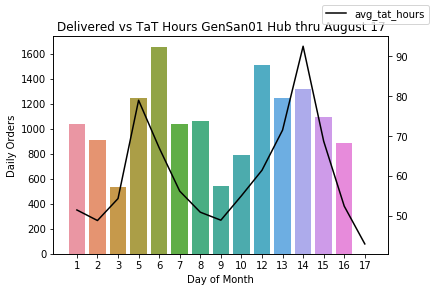

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours GenSan01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SCHubGenSan01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

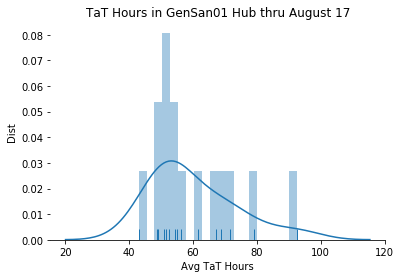

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in GenSan01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SCHubGenSan01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	Koronadal01 Hub by Month 2019

In [0]:
# Run SQL to Analyze Detailed Order Performance Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Koronadal01 Hub" # South Cotobato Province

hub_sc03_orders = query_to_bq2(sql_hub_orders)
hub_sc03_orders.head()

,date_delivered,delivery_city_xcode,del_xcode,order_id,delivered_within_sla,delivery_tat_hours
0,2019-08-01,Koronadal City SC03,SC03,31869435,1,47
1,2019-08-01,Koronadal City SC03,SC03,31869250,1,41
2,2019-08-01,Koronadal City SC03,SC03,31869030,1,46
3,2019-08-01,Koronadal City SC03,SC03,31868786,1,42
4,2019-08-01,Koronadal City SC03,SC03,31868578,1,45


In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Koronadal01 Hub" # South Cotobato Province

sum_SC03 = query_to_bq2(sql_hub_sum)
sum_SC03.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Koronadal01 Hub,Quad-X,4659,0.987336,78.371754
1,2019-08-01,LBC Express,LBC Express,1045,0.949282,107.757895


In [0]:
sum_SC03.loc[0, 'Median TaT Hours'] = hub_sc03_orders.delivery_tat_hours.median()
sum_SC03.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours,Median TaT Hours
0,2019-08-01,Koronadal01 Hub,Quad-X,4659,0.987336,78.371754,67.0
1,2019-08-01,LBC Express,LBC Express,1045,0.949282,107.757895,NaN


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Koronadal01 Hub" # South Cotobato Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Koronadal City SC03,SC03,386,0.997409,63.044041
1,2019-08-01,Surallah SC08,SC08,47,0.957447,81.425532
2,2019-08-01,Banga SC01,SC01,10,1.000000,63.500000
3,2019-08-02,Koronadal City SC03,SC03,252,1.000000,54.944444
4,2019-08-02,Surallah SC08,SC08,42,1.000000,69.690476


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
32,2019-08-15,Banga SC01,SC01,30,0.966667,96.533333
33,2019-08-16,Koronadal City SC03,SC03,275,0.970909,86.032727
34,2019-08-16,Surallah SC08,SC08,64,0.937500,106.609375
35,2019-08-17,Koronadal City SC03,SC03,56,0.982143,63.035714
36,2019-08-17,Surallah SC08,SC08,33,0.939394,82.121212


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

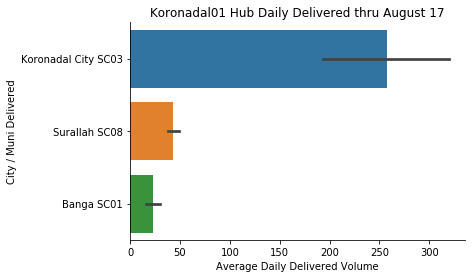

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Koronadal01 Hub Daily Delivered thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['right'].set_visible(False)


# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SC03HubCDO01DayDel" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

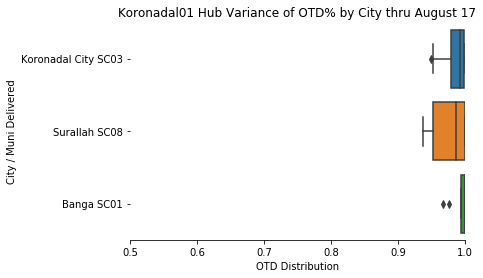

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Koronadal01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.5, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SC03HubCDO01OTDVar" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Koronadal01 Hub" # South Cotobato Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,2019-08-01,1,4-Thu,443.0,0.993228,65.004515
1,2019-08-02,2,5-Fri,294.0,1.000000,57.051020
2,2019-08-03,3,6-Sat,132.0,0.977273,59.636364
3,2019-08-04,4,7-Sun,NaN,NaN,NaN
4,2019-08-05,5,1-Mon,312.0,0.951923,72.134615


In [0]:
otd_day.sort_values('otd_pct').head()

,date,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
9,2019-08-10,10,6-Sat,20.0,0.950000,88.750000
4,2019-08-05,5,1-Mon,312.0,0.951923,72.134615
15,2019-08-16,16,5-Fri,339.0,0.964602,89.917404
16,2019-08-17,17,6-Sat,89.0,0.966292,70.112360
7,2019-08-08,8,4-Thu,282.0,0.975177,60.815603


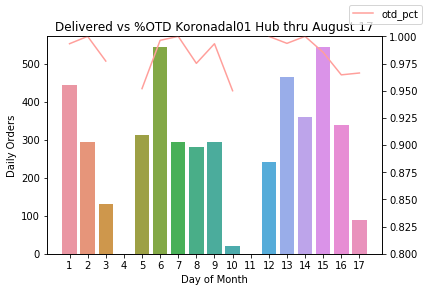

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Koronadal01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SC03HubCDO01DelvsOTD" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

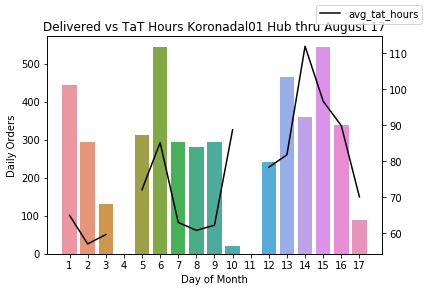

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Koronadal01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SC03HubCDO01DelvsTaT" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


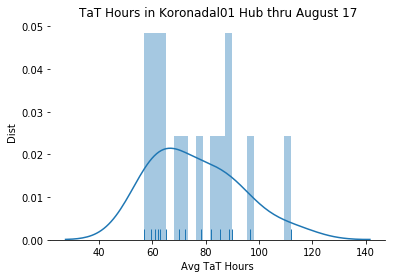

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Koronadal01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Change Titles and Labels here
# specify plotname to use for filename
dirname = "" # './gdrive/"My Drive"/tempData/' 
plotname = dirname +  "SC03HubCDO01TaTHours" + mon_input + max_date
plt.savefig("./{}.jpg".format(plotname), bbox_inches='tight', format='jpg', dpi=75)
# plt.show()

### 	Mbalay 01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Mbalay 01 Hub" # Bukidnon Province

sum_BK13 = query_to_bq2(sql_hub_sum)
sum_BK13.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Mbalay 01 Hub,Quad-X,1431,0.981831,93.808526
1,2019-08-01,LBC Express,LBC Express,26,0.846154,94.961538


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Mbalay 01 Hub" # Bukidnon Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Malaybalay City BK13,BK13,206,0.975728,91.359223
1,2019-08-03,Malaybalay City BK13,BK13,236,0.978814,90.627119
2,2019-08-05,Malaybalay City BK13,BK13,242,0.995868,104.925620
3,2019-08-06,Malaybalay City BK13,BK13,290,0.996552,90.482759
4,2019-08-07,Malaybalay City BK13,BK13,123,0.991870,89.983740


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
2,2019-08-05,Malaybalay City BK13,BK13,242,0.995868,104.925620
3,2019-08-06,Malaybalay City BK13,BK13,290,0.996552,90.482759
4,2019-08-07,Malaybalay City BK13,BK13,123,0.991870,89.983740
5,2019-08-08,Malaybalay City BK13,BK13,33,0.969697,114.454545
6,2019-08-09,Malaybalay City BK13,BK13,301,0.960133,91.544850


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

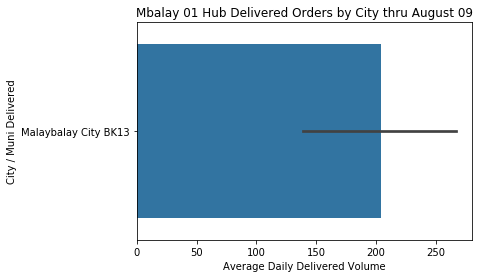

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Mbalay 01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

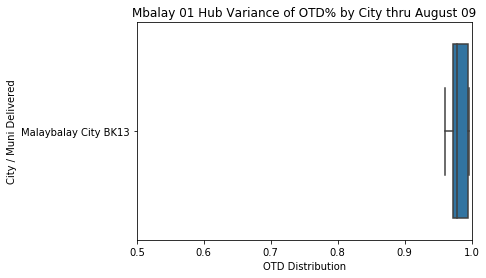

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Mbalay 01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.5, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Mbalay 01 Hub" # Bukidnon Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,206,0.975728,91.359223
1,3,6-Sat,236,0.978814,90.627119
2,5,1-Mon,242,0.995868,104.925620
3,6,2-Tue,290,0.996552,90.482759
4,7,3-Wed,123,0.991870,89.983740


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
6,9,5-Fri,301,0.960133,91.544850
5,8,4-Thu,33,0.969697,114.454545
0,1,4-Thu,206,0.975728,91.359223
1,3,6-Sat,236,0.978814,90.627119
4,7,3-Wed,123,0.991870,89.983740


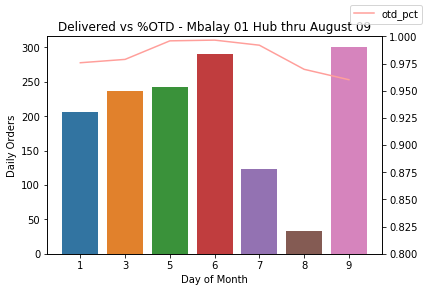

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD - Mbalay 01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

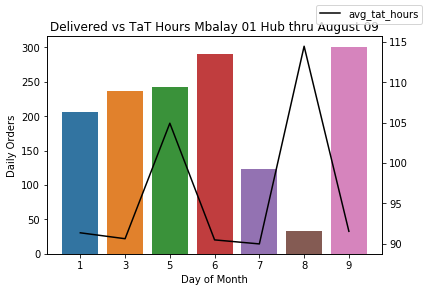

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Mbalay 01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

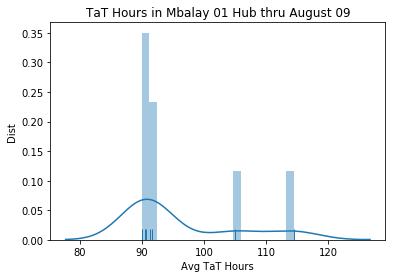

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Mbalay 01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()

### 	Panabo01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Panabo01 Hub" # Davao del Norte Province

sum_DN07 = query_to_bq2(sql_hub_sum)
sum_DN07.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Panabo01 Hub,Quad-X,542,0.990775,88.062731
1,2019-08-01,LBC Express,LBC Express,19,0.947368,107.736842


In [0]:
# Append Hub Summary to dataframe
# df_sum = df_sum.append(sum_DN07, ignore_index=True)
# df_sum

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Panabo01 Hub" # Davao del Norte Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Panabo City DN07,DN07,74,1.000000,65.797297
1,2019-08-02,Panabo City DN07,DN07,45,1.000000,64.866667
2,2019-08-03,Panabo City DN07,DN07,29,1.000000,62.517241
3,2019-08-06,Panabo City DN07,DN07,167,0.994012,93.628743
4,2019-08-07,Panabo City DN07,DN07,110,0.990909,108.618182


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
2,2019-08-03,Panabo City DN07,DN07,29,1.000000,62.517241
3,2019-08-06,Panabo City DN07,DN07,167,0.994012,93.628743
4,2019-08-07,Panabo City DN07,DN07,110,0.990909,108.618182
5,2019-08-08,Panabo City DN07,DN07,70,0.957143,100.914286
6,2019-08-10,Panabo City DN07,DN07,47,1.000000,74.063830


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

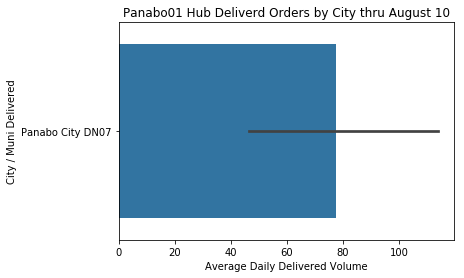

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Panabo01 Hub Deliverd Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

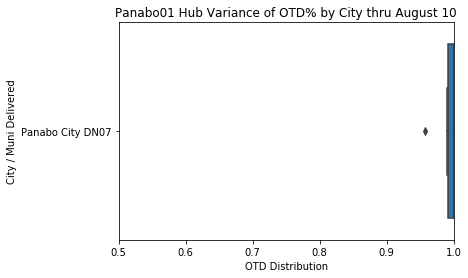

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Panabo01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.5, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Panabo01 Hub" # Davao del Norte Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,74,1.000000,65.797297
1,2,5-Fri,45,1.000000,64.866667
2,3,6-Sat,29,1.000000,62.517241
3,6,2-Tue,167,0.994012,93.628743
4,7,3-Wed,110,0.990909,108.618182


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
5,8,4-Thu,70,0.957143,100.914286
4,7,3-Wed,110,0.990909,108.618182
3,6,2-Tue,167,0.994012,93.628743
0,1,4-Thu,74,1.000000,65.797297
1,2,5-Fri,45,1.000000,64.866667


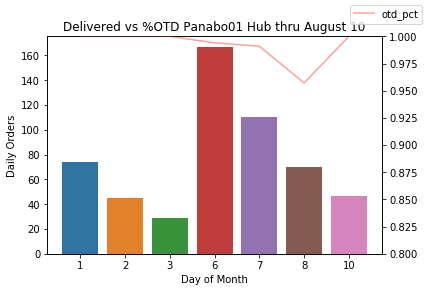

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Panabo01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

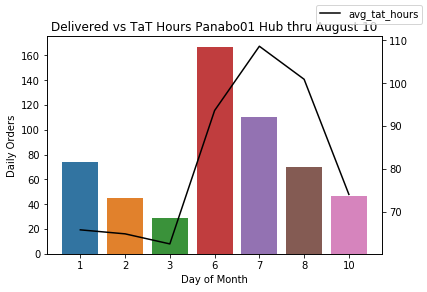

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Panabo01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

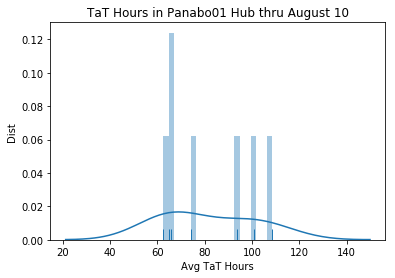

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Panabo01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()

### Valencia 01 Hub by Month 2019

In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Valencia 01 Hub" # Bukidnon Province

sum_BK22 = query_to_bq2(sql_hub_sum)
sum_BK22.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,24,0.916667,117.666667
1,2019-08-01,Valencia 01 Hub,Quad-X,1274,0.977237,102.310832


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Valencia 01 Hub" # Bukidnon Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Valencia City BK22,BK22,220,0.977273,95.622727
1,2019-08-03,Valencia City BK22,BK22,231,0.956710,105.047619
2,2019-08-05,Valencia City BK22,BK22,125,1.000000,95.008000
3,2019-08-06,Valencia City BK22,BK22,261,0.988506,104.486590
4,2019-08-07,Valencia City BK22,BK22,222,0.990991,99.860360


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
3,2019-08-06,Valencia City BK22,BK22,261,0.988506,104.486590
4,2019-08-07,Valencia City BK22,BK22,222,0.990991,99.860360
5,2019-08-08,Valencia City BK22,BK22,9,1.000000,85.777778
6,2019-08-09,Valencia City BK22,BK22,168,1.000000,94.833333
7,2019-08-10,Valencia City BK22,BK22,38,0.763158,184.763158


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

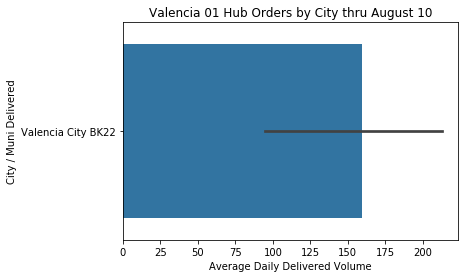

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Valencia 01 Hub Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

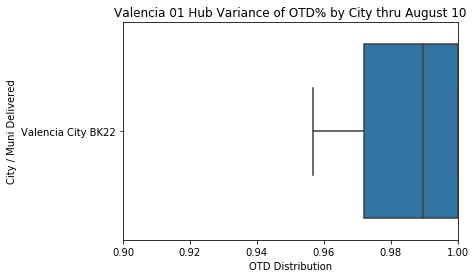

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Valencia 01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Valencia 01 Hub" # Bukidnon Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,220,0.977273,95.622727
1,3,6-Sat,231,0.956710,105.047619
2,5,1-Mon,125,1.000000,95.008000
3,6,2-Tue,261,0.988506,104.486590
4,7,3-Wed,222,0.990991,99.860360


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
7,10,6-Sat,38,0.763158,184.763158
1,3,6-Sat,231,0.956710,105.047619
0,1,4-Thu,220,0.977273,95.622727
3,6,2-Tue,261,0.988506,104.486590
4,7,3-Wed,222,0.990991,99.860360


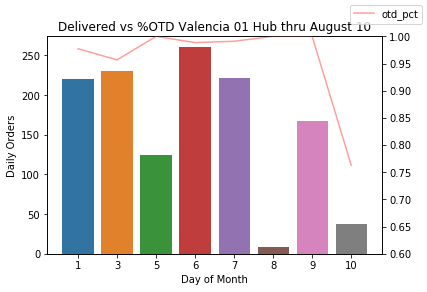

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.6, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Valencia 01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

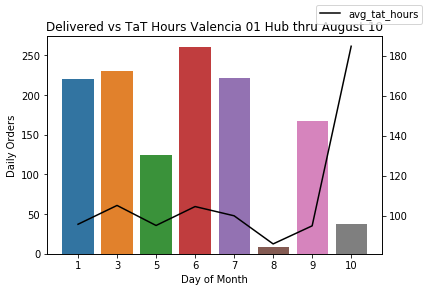

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Valencia 01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

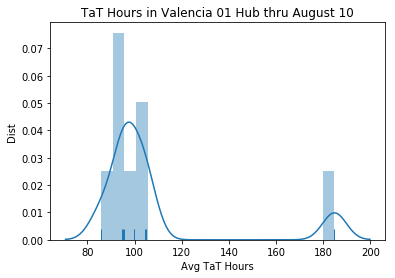

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours in Valencia 01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()

### Zamboanga01 Hub by Month 2019

In [0]:
# Run SQL to Analyze Detailed Order Performance Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Zamboanga01 Hub" # Zamboanga del Sur Province

hub_zs_orders = query_to_bq2(sql_hub_orders)
hub_zs_orders.head()

,date_delivered,delivery_city_xcode,del_xcode,order_id,delivered_within_sla,delivery_tat_hours
0,2019-08-01,Zamboanga City ZS28,ZS28,31823974,1,72
1,2019-08-01,Zamboanga City ZS28,ZS28,31822846,1,76
2,2019-08-01,Zamboanga City ZS28,ZS28,31822789,1,73
3,2019-08-01,Zamboanga City ZS28,ZS28,31822500,1,77
4,2019-08-01,Zamboanga City ZS28,ZS28,31821851,1,65


In [0]:
hub_zs_orders.date_delivered.unique().

AttributeError: ignored

In [0]:
hub_zs_orders.shape

(6670, 6)

In [0]:
# Calculate Median TaT Hours by City
(hub_zs_orders.loc[:, :]               # hub_zs_orders.delivered_within_sla == 1
  .groupby(['delivery_city_xcode'])    # 'date_delivered',
  .agg({'delivery_tat_hours' : 'median',
        'order_id' : 'count',
        'delivered_within_sla' : 'mean'}
       )
  .rename(columns={'delivery_tat_hours': 'Median TaT hours', 'delivered_within_sla': 'OTD %', 'order_id' : 'order count'})
  .sort_values('delivery_city_xcode')
  .head(10)
)

,Median TaT hours,order count,OTD %
delivery_city_xcode,,,
Zamboanga City ZS28,102,6670,0.967466


In [0]:
# Run SQL to generate summary of Performance Metrics for specific hub (@hub_code) and date (@month)
hub_input = "Zamboanga01 Hub" # Zamboanga del Sur Province

sum_ZS = query_to_bq2(sql_hub_sum)
sum_ZS.head()

,month,delivery_hub,delivery_courier,order_count,otd_pct,avg_tat_hours
0,2019-08-01,LBC Express,LBC Express,236,0.868644,112.580508
1,2019-08-01,Zamboanga01 Hub,Quad-X,6670,0.967466,118.836282


In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Zamboanga01 Hub" # Zamboanga del Sur Province

hub_pm = query_to_bq2(sql_hub_stats)
hub_pm.head()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
0,2019-08-01,Zamboanga City ZS28,ZS28,370,0.983784,138.464865
1,2019-08-02,Zamboanga City ZS28,ZS28,392,0.984694,91.841837
2,2019-08-03,Zamboanga City ZS28,ZS28,361,0.983380,90.700831
3,2019-08-05,Zamboanga City ZS28,ZS28,305,0.980328,118.334426
4,2019-08-06,Zamboanga City ZS28,ZS28,426,0.997653,111.206573


In [0]:
hub_pm.tail()

,date_delivered,delivery_city_xcode,del_xcode,order_count,otd_pct,avg_tat_hours
4,2019-08-06,Zamboanga City ZS28,ZS28,426,0.997653,111.206573
5,2019-08-07,Zamboanga City ZS28,ZS28,556,0.987410,108.897482
6,2019-08-08,Zamboanga City ZS28,ZS28,507,0.972387,114.536489
7,2019-08-09,Zamboanga City ZS28,ZS28,548,0.945255,103.067518
8,2019-08-10,Zamboanga City ZS28,ZS28,394,0.852792,143.063452


In [0]:
# extract the max(date) and set values for Month and Date for Chart Title
hub_pm = hub_pm.set_index(hub_pm.date_delivered)
mon_input = hub_pm.index.max().strftime('%B')
max_date = hub_pm.index.max().strftime('%d')

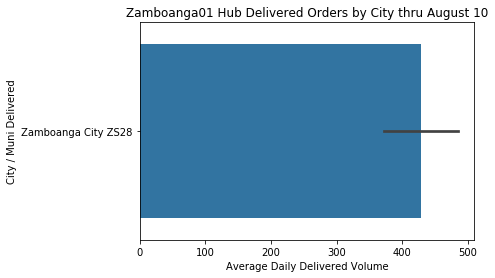

In [0]:
# Plot Volume of Orders / Day by City
sns.set_color_codes("pastel")
vol = sns.barplot(x=hub_pm['order_count'], y=hub_pm['delivery_city_xcode'], Label='Daily Order Count')

# Change Titles and Labels here
vol.set_title("Zamboanga01 Hub Delivered Orders by City thru " + mon_input + ' ' + max_date)
vol.set_xlabel("Average Daily Delivered Volume")
vol.set_ylabel("City / Muni Delivered")

plt.show()

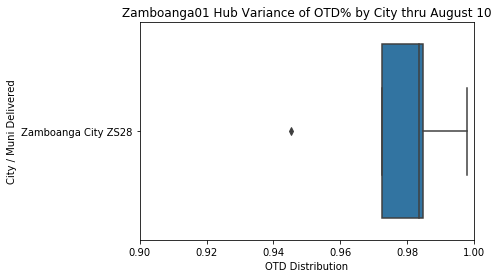

In [0]:
# Plot OTD Performance

sla = sns.boxplot(x=hub_pm['otd_pct'], y=hub_pm['delivery_city_xcode'])

# Change Titles and Labels here
sla.set_title("Zamboanga01 Hub Variance of OTD% by City thru " + mon_input + ' ' + max_date)
sla.set_xlabel("OTD Distribution")
sla.set_ylabel("City / Muni Delivered")
plt.xlim(0.9, 1.0)
plt.gca().spines['top'].set_visible(False)                                      # turn off top and right lines
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=0.98,linewidth=3, color='r', linestyle='--')                      # specify dashed line at threshold of 98% OTD

plt.show()

In [0]:
# Run SQL to Analyze Daily OTD Statistics for specific hub (@hub_code) and date (@month)
hub_input = "Zamboanga01 Hub" # Zamboanga del Sur Province

otd_day = query_to_bq2(sql_hub_daily2)
otd_day.head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
0,1,4-Thu,370,0.983784,138.464865
1,2,5-Fri,392,0.984694,91.841837
2,3,6-Sat,361,0.983380,90.700831
3,5,1-Mon,305,0.980328,118.334426
4,6,2-Tue,426,0.997653,111.206573


In [0]:
otd_day.loc[::-1].head(10)

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
8,10,6-Sat,394,0.852792,143.063452
7,9,5-Fri,548,0.945255,103.067518
6,8,4-Thu,507,0.972387,114.536489
5,7,3-Wed,556,0.987410,108.897482
4,6,2-Tue,426,0.997653,111.206573
3,5,1-Mon,305,0.980328,118.334426
2,3,6-Sat,361,0.983380,90.700831
1,2,5-Fri,392,0.984694,91.841837
0,1,4-Thu,370,0.983784,138.464865


In [0]:
otd_day.sort_values('otd_pct').head()

,day_delv,day_of_week,order_count,otd_pct,avg_tat_hours
8,10,6-Sat,394,0.852792,143.063452
7,9,5-Fri,548,0.945255,103.067518
6,8,4-Thu,507,0.972387,114.536489
3,5,1-Mon,305,0.980328,118.334426
2,3,6-Sat,361,0.983380,90.700831


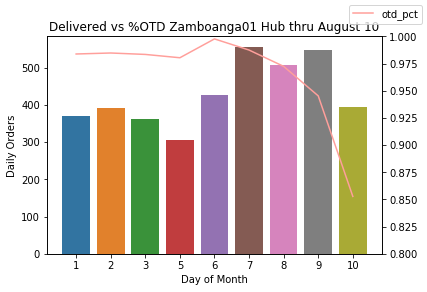

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: % OTD  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['otd_pct'], color="r") #New
# df_wk.plot(x="day_delv", y="otd_pct", ax=ax2, legend=False, color="r")
plt.ylim((0.8, 1.0))   # set limits to OTD %

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs %OTD Zamboanga01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

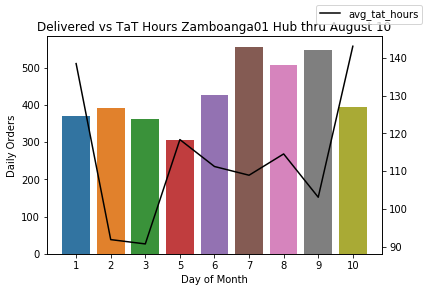

In [0]:
# Plot Days and compare 2 y-values:  y1: daily delivered orders, y2: TaT Hours  

# Set values for Day of Month and 2 columns to compare
ax = sns.barplot(x=otd_day['day_delv'], y=otd_day['order_count'])
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),otd_day['avg_tat_hours'], color="black") #New
# plt.ylim((0, 1.0))   # set limits to TaT Hours

# Set Labels and Plot data points
sns.set_color_codes("pastel")
ax.set_title("Delivered vs TaT Hours Zamboanga01 Hub thru " + mon_input + ' ' + max_date)
ax.set_xlabel("Day of Month")
ax.set_ylabel("Daily Orders")
ax.figure.legend()
plt.show()

In [0]:
# Use Day Delivered as index and sort in ascending order
by_day = otd_day.set_index('day_delv')
by_day = by_day.sort_index()

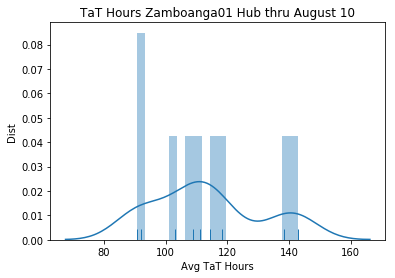

In [0]:
# Plot Volume of Orders / Week in Cebu Hub
sns.set_color_codes("pastel")
tatdist = sns.distplot(otd_day['avg_tat_hours'], bins=20, rug=True)

# Change Titles and Labels here
tatdist.set_title("TaT Hours Zamboanga01 Hub thru " + mon_input + ' ' + max_date)
tatdist.set_xlabel("Avg TaT Hours")
tatdist.set_ylabel("Dist")

plt.show()